In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

plt.rcParams['figure.figsize']=[12,10]

import warnings
warnings.filterwarnings("ignore")


In [28]:
hr=pd.read_csv('train_LZdllcl.csv')
hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [29]:
null_count=hr.isnull().sum()
null_percent=hr.isnull().sum()/len(hr)*100
null=pd.DataFrame({'null_count':null_count.values,'null_percent':null_percent.values},index=hr.columns)
null

,null_count,null_percent
employee_id,0,0.000000
department,0,0.000000
region,0,0.000000
education,2409,4.395344
gender,0,0.000000
recruitment_channel,0,0.000000
no_of_trainings,0,0.000000
age,0,0.000000
previous_year_rating,4124,7.524449
length_of_service,0,0.000000


# NULL Imputation

In [30]:
ind=hr[hr['education'].isna()].index

In [31]:
for i in ind:
    if hr.loc[i,'length_of_service']<=3:
        hr.loc[i,'education']='Below Secondary'
    if hr.loc[i,'length_of_service']>3 and hr.loc[i,'length_of_service']<7:
        hr.loc[i,'education']="Bachelor's"    
    else:
        hr.loc[i,'education']="Master's & above"   

In [ ]:
#rule based imputation with column education

In [ ]:
hr['previous_year_rating'].mode()

In [32]:
hr['previous_year_rating']=hr['previous_year_rating'].replace({np.nan:3.0}) #mode imputation

In [33]:
null_count=hr.isnull().sum()
null_percent=hr.isnull().sum()/len(hr)*100
null=pd.DataFrame({'null_count':null_count.values,'null_percent':null_percent.values},index=hr.columns)
null

,null_count,null_percent
employee_id,0,0.0
department,0,0.0
region,0,0.0
education,0,0.0
gender,0,0.0
recruitment_channel,0,0.0
no_of_trainings,0,0.0
age,0,0.0
previous_year_rating,0,0.0
length_of_service,0,0.0


<AxesSubplot:>

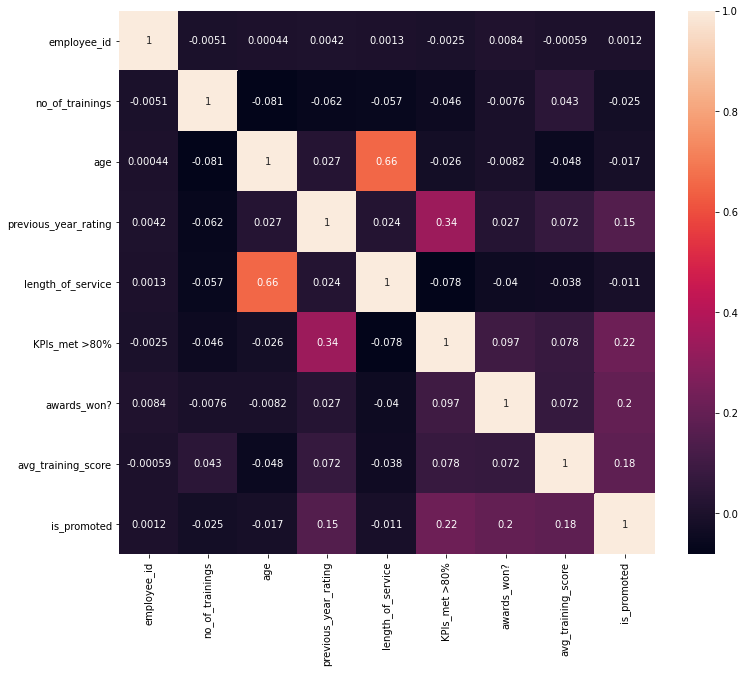

In [34]:
sns.heatmap(hr.corr(), annot=True)

In [35]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


#Copying dataframe various operations

In [36]:
hr1=hr.copy()#for scaling

In [37]:
hr_woe=hr.copy()#for woe encoding

In [38]:
hr1['KPIs_met >80%']=hr1['KPIs_met >80%'].astype('object')
hr1['awards_won?']=hr1['awards_won?'].astype('object')
hr1['is_promoted']=hr1['is_promoted'].astype('object')

In [39]:
hr_num=hr1.select_dtypes(include=np.number)
hr_cat=hr1.select_dtypes(exclude=np.number)

In [40]:
hr_num=hr_num.set_index('employee_id')


In [41]:
hr_num.head()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
employee_id,,,,,
65438,1,35,5.0,8,49
65141,1,30,5.0,4,60
7513,1,34,3.0,7,50
2542,2,39,1.0,10,50
48945,1,45,3.0,2,73


In [42]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
hr_s=ss.fit_transform(hr_num)

In [43]:
hr_scale=pd.DataFrame(hr_s,columns=hr_num.columns,index=hr_num.index)

In [44]:
hr_cat=pd.get_dummies(data=hr_cat,columns=['department','education','gender','recruitment_channel'],drop_first=True)

In [45]:
m=hr_cat['region'].value_counts()
hr_cat['region']=hr_cat['region'].map(m)

In [46]:
hr_cat=hr_cat.set_index(hr_scale.index)

In [47]:
print(hr_scale.shape)
print(hr_cat.shape)

(54808, 5)
(54808, 17)


In [48]:
hr_scaled=pd.concat([hr_scale,hr_cat],axis=1)
hr_scaled.shape

(54808, 22)

In [49]:
hr_num.skew()

no_of_trainings         3.445434
age                     1.007432
previous_year_rating   -0.260858
length_of_service       1.738061
avg_training_score      0.451908
dtype: float64

# Encoding

In [ ]:
#one-Hot encoding for columns "'department','education','gender','recruitment_channel'"

In [50]:
hr=pd.get_dummies(data=hr,columns=['department','education','gender','recruitment_channel']
                  ,drop_first=True)

In [ ]:
#Frequency encoding for column 'region'

In [51]:
m=hr['region'].value_counts()
hr['region']=hr['region'].map(m)

In [52]:
hr=hr.set_index('employee_id')

In [53]:
hr.head()

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,4843,1,35,5.0,8,1,0,49,0,0,...,0,0,0,1,0,0,1,0,0,1
65141,6428,1,30,5.0,4,0,0,60,0,0,...,1,0,0,0,0,0,0,1,0,0
7513,874,1,34,3.0,7,0,0,50,0,0,...,0,0,0,1,0,0,0,1,0,1
2542,1175,2,39,1.0,10,0,0,50,0,0,...,0,0,0,1,0,0,0,1,0,0
48945,2260,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,1,0,0,1,0,0


# MODELS

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import sklearn.metrics as metrics 
from sklearn.model_selection import cross_val_score

In [55]:
x=hr.drop('is_promoted',axis=1)
y=hr['is_promoted']
y=y.astype('int')

In [56]:
X=sm.add_constant(x)

In [57]:
ols_model=sm.Logit(y,X).fit()


Optimization terminated successfully.
         Current function value: 0.198849
         Iterations 8


In [58]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                54808
Model:                          Logit   Df Residuals:                    54786
Method:                           MLE   Df Model:                           21
Date:                Wed, 23 Feb 2022   Pseudo R-squ.:                  0.3172
Time:                        10:45:09   Log-Likelihood:                -10899.
converged:                       True   LL-Null:                       -15961.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -29.9348      0.466    -64.245      0.000     -30.848     -29.022
region                        1.256e-05   4.41e-06      2.850      0.004    3.92e-06    2.12e-05
no_of_trainings                 -0.1079      0.035     -3.118      0.002      -0.176      -0.040
age                             -0.0286      0.004     -7.996      0.000      -0.036      -0.022
previous_year_rating             0.2591      0.017     15.026      0.000       0.225       0.293
length_of_service                0.0282      0.006      4.752      0.000       0.017       0.040
KPIs_met >80%                    1.8790      0.044     42.659      0.000       1.793       1.965
awards_won?                      1.4752      0.079     18.761      0.000       1.321       1.629
avg_training_score               0.3081      0.005     60.302      0.000       0.298       0.318
department_Finance               7.1472      0.159     44.996      0.000       6.836       7.459
department_HR                   10.0516      0.210     47.879      0.000       9.640      10.463
department_Legal                 6.9818      0.211     33.138      0.000       6.569       7.395
department_Operations            7.3102      0.140     52.116      0.000       7.035       7.585
department_Procurement           4.4387      0.104     42.821      0.000       4.236       4.642
department_R&D                  -0.4592      0.146     -3.142      0.002      -0.746      -0.173
department_Sales & Marketing    10.4856      0.187     56.130      0.000      10.119      10.852
department_Technology            1.7452      0.074     23.491      0.000       1.600       1.891
education_Below Secondary       -0.1407      0.154     -0.916      0.360      -0.442       0.161
education_Master's & above       0.1919      0.042      4.609      0.000       0.110       0.273
gender_m                         0.0194      0.041      0.469      0.639      -0.062       0.101
recruitment_channel_referred    -0.0994      0.113     -0.881      0.378      -0.320       0.122
recruitment_channel_sourcing    -0.0097      0.037     -0.260      0.795      -0.082       0.063
================================================================================================
"""

In [ ]:
#insignificant column are 'education_Below Secondary','gender_m','recruitment_channel_referred','recruitment_channel_sourcing'

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x.drop(['education_Below Secondary','gender_m','recruitment_channel_referred',
                                                            'recruitment_channel_sourcing'],axis=1), 
                                                    y, test_size=0.30,random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(38365, 17)
(38365,)
(16443, 17)
(16443,)


In [63]:
X_train.head(2)

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Master's & above
employee_id,,,,,,,,,,,,,,,,,
53947,12343,1,59,5.0,6,0,0,59,0,0,0,1,0,0,0,0,0
43072,292,1,27,1.0,4,0,0,56,0,0,0,1,0,0,0,0,0


In [79]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)
print("Training Accuracy")
print(lr.score(X_train,y_train))
print("Testing Accuracy")
print(lr.score(X_test,y_test))
y_pred= lr.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

scores1=cross_val_score(lr,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores1))
print('cross_val_varience_train',np.std(scores1)/np.mean(scores1))
print('')
scores1=cross_val_score(lr,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))


Training Accuracy
0.6965723967157565
Testing Accuracy
0.6888645624277808
Confusion Matrix
[[10307  4757]
 [  359  1020]]
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     15064
           1       0.18      0.74      0.29      1379

    accuracy                           0.69     16443
   macro avg       0.57      0.71      0.54     16443
weighted avg       0.90      0.69      0.76     16443

cross_val_f1_train 0.5361173911637599
cross_val_varience_train 0.052547808295940225

cross_val_f1_test 0.5089011308449205
cross_val_varience_test 0.046609830595935084


In [76]:
R1= pd.DataFrame(columns=['Model','AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score', 'Kappa Score', 'f1_macro'])
   
R1= R1.append({ 'Model':'Logistic','AUC Score' : metrics.roc_auc_score(y_test, y_pred),'Precision Score': metrics.precision_score(y_test, y_pred), 
               'Recall Score': metrics.recall_score(y_test, y_pred),'Accuracy Score': metrics.accuracy_score(y_test, y_pred), 
               'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred), 'f1_macro':avg_f1 }, ignore_index=True)

In [77]:
R1

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.722924,0.184215,0.749819,0.700541,0.186186,0.51543


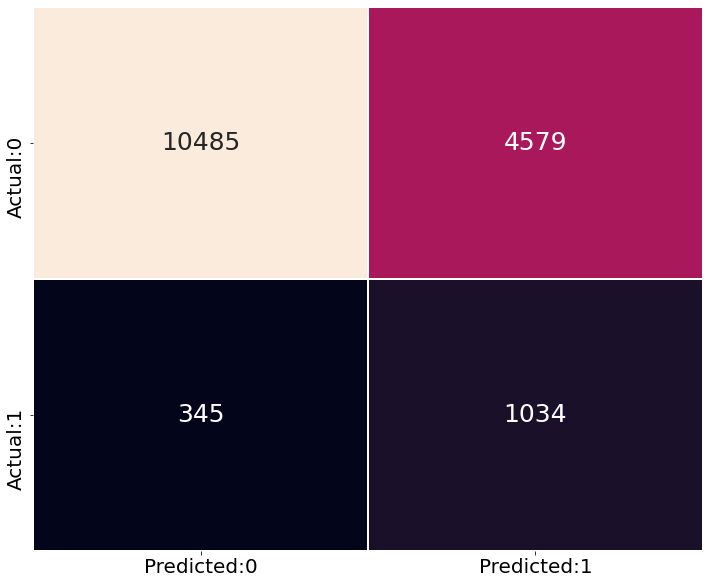

In [78]:
cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [80]:
y_train.value_counts()

0    35076
1     3289
Name: is_promoted, dtype: int64

In [81]:
y_test.value_counts()

0    15064
1     1379
Name: is_promoted, dtype: int64

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=11)
dt.fit(X_train,y_train)
print("Training Accuracy")
print(dt.score(X_train,y_train))
print("Testing Accuracy")
print(dt.score(X_test,y_test))
y_pred= dt.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

scores=cross_val_score(dt,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_train',np.std(scores)/np.mean(scores))


scores1=cross_val_score(dt,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))

Training Accuracy
0.7476606281767236
Testing Accuracy
0.7350240223803443
Confusion Matrix
[[10851  4213]
 [  144  1235]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83     15064
           1       0.23      0.90      0.36      1379

    accuracy                           0.74     16443
   macro avg       0.61      0.81      0.60     16443
weighted avg       0.92      0.74      0.79     16443

cross_val_f1_train 0.594601693028044
cross_val_varience_train 0.00934886972593368
cross_val_f1_test 0.5931775775884673


In [86]:
R1=R1.append({ 'Model':'Decisiontree','AUC Score' : metrics.roc_auc_score(y_test, y_pred),'Precision Score': metrics.precision_score(y_test, y_pred), 
               'Recall Score': metrics.recall_score(y_test, y_pred),'Accuracy Score': metrics.accuracy_score(y_test, y_pred), 
               'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred), 'f1_macro': avg_f1}, ignore_index=True)

In [87]:
R1

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.722924,0.184215,0.749819,0.700541,0.186186,0.515430
1,Decisiontree,0.807952,0.226689,0.895577,0.735024,0.263174,0.593178


In [95]:
lr1 = LogisticRegression(class_weight='balanced',n_jobs=6)
dt = DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=12)
rfc=RandomForestClassifier(n_estimators=80,max_depth=9,criterion='entropy',class_weight='balanced')
gnb=GaussianNB()
gbc = GradientBoostingClassifier(n_estimators = 60,max_depth=6, random_state = 10)
abc = AdaBoostClassifier( n_estimators=50,random_state = 10)
xgbc = XGBClassifier(n_estimators=65,max_depth=5,random_state = 10,gamma = 1,class_weight='balanced')

rfc.fit(X_train.drop('length_of_service',axis=1), y_train)
predictions = rfc.predict(X_test.drop('length_of_service',axis=1))
predictions_train=rfc.predict(X_train.drop('length_of_service',axis=1))

print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(rfc,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_train',np.std(scores)/np.mean(scores))

scores1=cross_val_score(rfc,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))


train accuracy : 0.7152613058777532
test accuracy : 0.7063796144255914
[[24392 10684]
 [  240  3049]]
              precision    recall  f1-score   support

           0       0.99      0.70      0.82     35076
           1       0.22      0.93      0.36      3289

    accuracy                           0.72     38365
   macro avg       0.61      0.81      0.59     38365
weighted avg       0.92      0.72      0.78     38365

[[10360  4704]
 [  124  1255]]
              precision    recall  f1-score   support

           0       0.99      0.69      0.81     15064
           1       0.21      0.91      0.34      1379

    accuracy                           0.71     16443
   macro avg       0.60      0.80      0.58     16443
weighted avg       0.92      0.71      0.77     16443

Train_roc_auc 0.8112168786357009
Test_roc_auc 0.7989060549776116
cross_val_f1_train 0.5807912039997285
cross_val_varience_train 0.005636934632067781
cross_val_f1_test 0.5886613692981748
cross_val_varience_test 0.0

In [96]:
R1=R1.append({ 'Model':'RandomForest','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)
R1

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.722924,0.184215,0.749819,0.700541,0.186186,0.515430
1,Decisiontree,0.807952,0.226689,0.895577,0.735024,0.263174,0.593178
2,RandomForest,0.798906,0.210606,0.910080,0.706380,0.238305,0.588661


In [97]:
lr1 = LogisticRegression(class_weight='balanced',n_jobs=6)
dt = DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=12)
rfc=RandomForestClassifier(n_estimators=80,max_depth=9,criterion='entropy',class_weight='balanced')
gnb=GaussianNB()
gbc = GradientBoostingClassifier(n_estimators = 60,max_depth=6, random_state = 10)
abc = AdaBoostClassifier( n_estimators=50,random_state = 10)
xgbc = XGBClassifier(n_estimators=65,max_depth=5,random_state = 10,gamma = 1,class_weight='balanced')

gbc.fit(X_train, y_train)
predictions = gbc.predict(X_test)
predictions_train=gbc.predict(X_train)
print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(gbc,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_train',np.std(scores)/np.mean(scores))

scores1=cross_val_score(gbc,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))

train accuracy : 0.9447934315130979
test accuracy : 0.9430152648543453
[[35047    29]
 [ 2089  1200]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     35076
           1       0.98      0.36      0.53      3289

    accuracy                           0.94     38365
   macro avg       0.96      0.68      0.75     38365
weighted avg       0.95      0.94      0.93     38365

[[15031    33]
 [  904   475]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15064
           1       0.94      0.34      0.50      1379

    accuracy                           0.94     16443
   macro avg       0.94      0.67      0.74     16443
weighted avg       0.94      0.94      0.93     16443

Train_roc_auc 0.6820128813111753
Test_roc_auc 0.6711309242999749
cross_val_f1_train 0.7300519899462729
cross_val_varience_train 0.009226477804754009
cross_val_f1_test 0.7209569897281807
cross_val_varience_test 0.0

In [98]:
R1=R1.append({ 'Model':'Gradient','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)
R1

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.722924,0.184215,0.749819,0.700541,0.186186,0.515430
1,Decisiontree,0.807952,0.226689,0.895577,0.735024,0.263174,0.593178
2,RandomForest,0.798906,0.210606,0.910080,0.706380,0.238305,0.588661
3,Gradient,0.671131,0.935039,0.344453,0.943015,0.479962,0.720957


In [99]:
gbc = GradientBoostingClassifier(n_estimators = 40,max_depth=4, random_state = 10)
xgbc = XGBClassifier(n_estimators=25,max_depth=4,random_state = 10,gamma = 1,class_weight='balanced')


gbc.fit(X_train.drop('length_of_service',axis=1), y_train)
predictions = gbc.predict(X_test.drop('length_of_service',axis=1))
predictions_train=gbc.predict(X_train.drop('length_of_service',axis=1))
print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(gbc,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_train',np.std(scores)/np.mean(scores))

scores1=cross_val_score(gbc,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))

train accuracy : 0.9377297015508927
test accuracy : 0.938089156479961
[[35047    29]
 [ 2360   929]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     35076
           1       0.97      0.28      0.44      3289

    accuracy                           0.94     38365
   macro avg       0.95      0.64      0.70     38365
weighted avg       0.94      0.94      0.92     38365

[[15043    21]
 [  997   382]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15064
           1       0.95      0.28      0.43      1379

    accuracy                           0.94     16443
   macro avg       0.94      0.64      0.70     16443
weighted avg       0.94      0.94      0.92     16443

Train_roc_auc 0.6408149488088948
Test_roc_auc 0.6378091378645697
cross_val_f1_train 0.6901812749212224
cross_val_varience_train 0.008532130643001184
cross_val_f1_test 0.6837561378235444
cross_val_varience_test 0.01

In [100]:
y_pred_prob=gbc.predict_proba(X_test.drop('length_of_service',axis=1))
y_pred_prob[:,1]

array([0.00636392, 0.00589079, 0.02695504, ..., 0.00733817, 0.03799031,
       0.02914188])

In [101]:
y_pred_prob1=gbc.predict_proba(X_train.drop('length_of_service',axis=1))
y_pred_prob1[:,1]

array([0.02269048, 0.00810911, 0.00733817, ..., 0.11762259, 0.15071352,
       0.01455953])

In [102]:
predictions=[1 if i>0.15 else 0 for i in y_pred_prob[:,1]]
predictions_train=[1 if i>0.15 else 0 for i in y_pred_prob1[:,1]]

# Adjusted thresold

In [103]:
print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

train accuracy : 0.8503323341587384
test accuracy : 0.8457094204220641
[[30363  4713]
 [ 1029  2260]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.91     35076
           1       0.32      0.69      0.44      3289

    accuracy                           0.85     38365
   macro avg       0.65      0.78      0.68     38365
weighted avg       0.91      0.85      0.87     38365

[[12960  2104]
 [  433   946]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     15064
           1       0.31      0.69      0.43      1379

    accuracy                           0.85     16443
   macro avg       0.64      0.77      0.67     16443
weighted avg       0.91      0.85      0.87     16443

Train_roc_auc 0.7763867849861246
Test_roc_auc 0.7731668063976106


In [104]:
lr1 = LogisticRegression(class_weight='balanced',n_jobs=6)
dt = DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=12)
rfc=RandomForestClassifier(n_estimators=80,max_depth=9,criterion='entropy',class_weight='balanced')
gnb=GaussianNB()
gbc = GradientBoostingClassifier(n_estimators = 60,max_depth=6, random_state = 10)
abc = AdaBoostClassifier( n_estimators=50,random_state = 10)
xgbc = XGBClassifier(n_estimators=65,max_depth=5,random_state = 10,gamma = 1,class_weight='balanced')

xgbc.fit(X_train.drop('length_of_service',axis=1), y_train)
predictions = xgbc.predict(X_test.drop('length_of_service',axis=1))
predictions_train=xgbc.predict(X_train.drop('length_of_service',axis=1))
print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(xgbc,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_train',np.std(scores)/np.mean(scores))

scores1=cross_val_score(xgbc,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))

[12:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy : 0.944428515574091
test accuracy : 0.9433193456181962
[[35047    29]
 [ 2103  1186]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     35076
           1       0.98      0.36      0.53      3289

    

In [105]:
R1=R1.append({ 'Model':'XGBoost','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)
R1

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.722924,0.184215,0.749819,0.700541,0.186186,0.515430
1,Decisiontree,0.807952,0.226689,0.895577,0.735024,0.263174,0.593178
2,RandomForest,0.798906,0.210606,0.910080,0.706380,0.238305,0.588661
3,Gradient,0.671131,0.935039,0.344453,0.943015,0.479962,0.720957
4,XGBoost,0.673603,0.932302,0.349529,0.943319,0.484879,0.730644


In [53]:
lr1 = LogisticRegression(class_weight='balanced',n_jobs=6)
dt = DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=12)
rfc=RandomForestClassifier(n_estimators=80,max_depth=9,criterion='entropy',class_weight='balanced')
gnb=GaussianNB()
gbc = GradientBoostingClassifier(n_estimators = 60,max_depth=6, random_state = 10)
abc = AdaBoostClassifier( n_estimators=50,random_state = 10)
xgbc = XGBClassifier(n_estimators=65,max_depth=5,random_state = 10,gamma = 1,class_weight='balanced')

abc.fit(X_train.drop('length_of_service',axis=1), y_train)
predictions = abc.predict(X_test.drop('length_of_service',axis=1))
predictions_train=abc.predict(X_train.drop('length_of_service',axis=1))
print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(abc,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_train',np.std(scores)/np.mean(scores))

scores1=cross_val_score(abc,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))

train accuracy : 0.9233155219601199
test accuracy : 0.9227026698291066
[[34837   239]
 [ 2703   586]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     35076
           1       0.71      0.18      0.28      3289

    accuracy                           0.92     38365
   macro avg       0.82      0.59      0.62     38365
weighted avg       0.91      0.92      0.90     38365

[[14939   125]
 [ 1146   233]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15064
           1       0.65      0.17      0.27      1379

    accuracy                           0.92     16443
   macro avg       0.79      0.58      0.61     16443
weighted avg       0.91      0.92      0.90     16443

Train_roc_auc 0.5856779403147042
Test_roc_auc 0.5803325439208952
cross_val_f1_train 0.6242163688364356
cross_val_varience_train 0.016700575919026364
cross_val_f1_test 0.6093439134100823
cross_val_varience_test 0.0

# MODEL building with WOE encoding

In [54]:
x1=hr_woe.drop(['is_promoted','recruitment_channel','gender'],axis=1,)
y1=hr_woe['is_promoted']

In [55]:
from xverse.transformer import WOE
clf = WOE()
clf.fit(x1, y1)

x1 = clf.transform(x1)
x1.head()

,employee_id,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.015377,-0.181815,0.247565,0.104282,0.037114,0.091442,0.742513,-0.008097,0.782029,-0.113269,-0.802673
1,0.015377,0.062260,0.325429,-0.049299,0.037114,0.009387,0.742513,0.020901,-0.814783,-0.113269,-0.112702
2,0.017396,-0.181815,-0.366143,-0.049299,0.037114,0.091442,-0.145625,-0.026314,-0.814783,-0.113269,-0.802673
3,0.017396,-0.181815,0.349018,-0.049299,-0.172219,-0.093772,-1.870340,-0.008097,-0.814783,-0.113269,-0.802673
4,-0.033460,0.258523,-0.320822,-0.049299,0.037114,-0.093772,-0.145625,0.020901,-0.814783,-0.113269,0.563726


In [56]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.30,random_state=10)

lr1 = LogisticRegression(class_weight='balanced',n_jobs=6)
rfc=RandomForestClassifier(n_estimators=80,max_depth=11,criterion='entropy',class_weight='balanced')
gnb=GaussianNB()
gbc = GradientBoostingClassifier(n_estimators = 60,max_depth=6, random_state = 10)
abc = AdaBoostClassifier( n_estimators=50,random_state = 10)
xgbc = XGBClassifier(lr1 = LogisticRegression(class_weight='balanced',n_jobs=6)
rfc=RandomForestClassifier(n_estimators=80,max_depth=11,criterion='entropy',class_weight='balanced')
gnb=GaussianNB()
gbc = GradientBoostingClassifier(n_estimators = 60,max_depth=6, random_state = 10)
abc = AdaBoostClassifier( n_estimators=50,random_state = 10)
svm=SVC(random_state=1)

In [57]:
xgbc = XGBClassifier(n_estimators=200,random_state = 10,gamma = 1)
rfc=RandomForestClassifier(n_estimators=80,max_depth=11,criterion='entropy',class_weight='balanced')

rfc.fit(x1_train, y1_train)
predictions = rfc.predict(x1_test)
predictions_train=rfc.predict(x1_train)

print('train accuracy :', accuracy_score(y1_train,predictions_train))
print('test accuracy :', accuracy_score(y1_test,predictions))

print(confusion_matrix(y1_train, predictions_train))
print(classification_report(y1_train, predictions_train))

print(confusion_matrix(y1_test, predictions))
print(classification_report(y1_test, predictions))

print('Train_roc_auc',roc_auc_score(y1_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y1_test, predictions))

scores=cross_val_score(rfc,x1_train,y1_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_train',np.std(scores)/np.mean(scores))

scores1=cross_val_score(rfc,x1_test,y1_test,cv=4,scoring='f1_macro')
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))

train accuracy : 0.7783917633259482
test accuracy : 0.7563096758499057
[[26861  8215]
 [  287  3002]]
              precision    recall  f1-score   support

           0       0.99      0.77      0.86     35076
           1       0.27      0.91      0.41      3289

    accuracy                           0.78     38365
   macro avg       0.63      0.84      0.64     38365
weighted avg       0.93      0.78      0.82     38365

[[11328  3736]
 [  271  1108]]
              precision    recall  f1-score   support

           0       0.98      0.75      0.85     15064
           1       0.23      0.80      0.36      1379

    accuracy                           0.76     16443
   macro avg       0.60      0.78      0.60     16443
weighted avg       0.91      0.76      0.81     16443

Train_roc_auc 0.8392668548832556
Test_roc_auc 0.7777361430485427
cross_val_f1_train 0.6123283597628927
cross_val_varience_train 0.008967065361394399
cross_val_f1_test 0.6254386491175129
cross_val_varience_test 0.0

# outlier treatment 

In [106]:
col=['age','previous_year_rating','length_of_service','avg_training_score']
for i in col:
    q3=X_train[i].quantile(0.75)
    q1=X_train[i].quantile(0.25)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    uc=X_train[i].quantile(0.99)
    lc=X_train[i].quantile(0.01)
    
    for j in X_train[i].index:
        if X_train.loc[j,i]>ub:
            X_train.loc[j,i]=uc
        if X_train.loc[j,i]<lb:
            X_train.loc[j,i]=lc

In [223]:
lr1 = LogisticRegression(class_weight='balanced',n_jobs=6)
dt = DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=12)
rfc=RandomForestClassifier(n_estimators=70,max_depth=11,criterion='entropy',class_weight='balanced')
gnb=GaussianNB()
gbc = GradientBoostingClassifier(n_estimators = 60,max_depth=6, random_state = 10)
abc = AdaBoostClassifier( n_estimators=50,random_state = 10)
xgbc = XGBClassifier(n_estimators=65,max_depth=5,random_state = 10,gamma = 1,class_weight='balanced')

lr1.fit(X_train.drop('length_of_service',axis=1), y_train)
predictions =lr1.predict(X_test.drop('length_of_service',axis=1))
predictions_train=lr1.predict(X_train.drop('length_of_service',axis=1))

print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(lr1,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_train',np.std(scores)/np.mean(scores))

scores1=cross_val_score(lr1,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))

train accuracy : 0.6984751726834354
test accuracy : 0.6906890470108861
[[24293 10783]
 [  785  2504]]
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     35076
           1       0.19      0.76      0.30      3289

    accuracy                           0.70     38365
   macro avg       0.58      0.73      0.55     38365
weighted avg       0.90      0.70      0.76     38365

[[10324  4740]
 [  346  1033]]
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     15064
           1       0.18      0.75      0.29      1379

    accuracy                           0.69     16443
   macro avg       0.57      0.72      0.55     16443
weighted avg       0.90      0.69      0.76     16443

Train_roc_auc 0.726953726609753
Test_roc_auc 0.7172180422751253
cross_val_f1_train 0.549191568101971
cross_val_varience_train 0.017118365973102255
cross_val_f1_test 0.5154296892109439
cross_val_varience_test 0.055

In [108]:
R1_ot= pd.DataFrame(columns=['Model','AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score', 'Kappa Score', 'f1_macro'])
   
R1_ot=R1_ot.append({ 'Model':'Logistic','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)


In [109]:
dt = DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=11)

dt.fit(X_train.drop('length_of_service',axis=1), y_train)
predictions =dt.predict(X_test.drop('length_of_service',axis=1))
predictions_train=dt.predict(X_train.drop('length_of_service',axis=1))

print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(dt,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_train',np.std(scores)/np.mean(scores))

scores1=cross_val_score(dt,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))

train accuracy : 0.7414570572136061
test accuracy : 0.7324089278112267
[[25353  9723]
 [  196  3093]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.84     35076
           1       0.24      0.94      0.38      3289

    accuracy                           0.74     38365
   macro avg       0.62      0.83      0.61     38365
weighted avg       0.93      0.74      0.80     38365

[[10797  4267]
 [  133  1246]]
              precision    recall  f1-score   support

           0       0.99      0.72      0.83     15064
           1       0.23      0.90      0.36      1379

    accuracy                           0.73     16443
   macro avg       0.61      0.81      0.60     16443
weighted avg       0.92      0.73      0.79     16443

Train_roc_auc 0.8316046672540893
Test_roc_auc 0.8101476003569205
cross_val_f1_train 0.5942481393464343
cross_val_varience_train 0.00973560755148668
cross_val_f1_test 0.5926476135259882
cross_val_varience_test 0.01

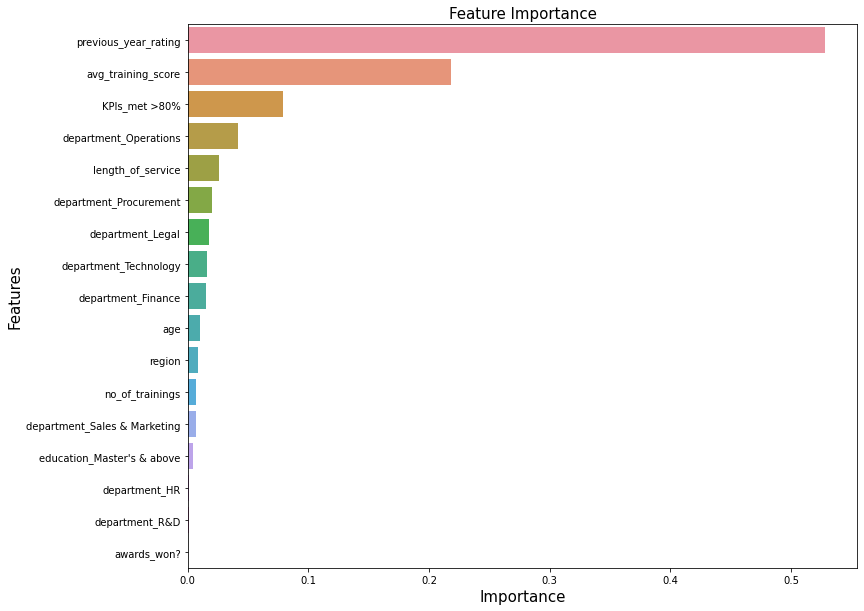

In [161]:
important_features = pd.DataFrame({'Features': X_train.columns, 'Importance': dt.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15) 
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15) 
plt.show()

In [110]:
R1_ot=R1_ot.append({ 'Model':'Decisiontree','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)
R1_ot

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.717218,0.178936,0.749094,0.690689,0.177514,0.515430
1,Decisiontree,0.810148,0.226011,0.903553,0.732409,0.262648,0.592648


In [162]:
rfc=RandomForestClassifier(n_estimators=90,max_depth=10,criterion='entropy',class_weight='balanced')

rfc.fit(X_train.drop('length_of_service',axis=1), y_train)
predictions =rfc.predict(X_test.drop('length_of_service',axis=1))
predictions_train=rfc.predict(X_train.drop('length_of_service',axis=1))

print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(rfc,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_train',np.std(scores)/np.mean(scores))

scores1=cross_val_score(rfc,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))

train accuracy : 0.7291802424084451
test accuracy : 0.7172657057714529
[[24909 10167]
 [  223  3066]]
              precision    recall  f1-score   support

           0       0.99      0.71      0.83     35076
           1       0.23      0.93      0.37      3289

    accuracy                           0.73     38365
   macro avg       0.61      0.82      0.60     38365
weighted avg       0.93      0.73      0.79     38365

[[10554  4510]
 [  139  1240]]
              precision    recall  f1-score   support

           0       0.99      0.70      0.82     15064
           1       0.22      0.90      0.35      1379

    accuracy                           0.72     16443
   macro avg       0.60      0.80      0.58     16443
weighted avg       0.92      0.72      0.78     16443

Train_roc_auc 0.8211709622689259
Test_roc_auc 0.7999065240422591
cross_val_f1_train 0.5883217228833961
cross_val_varience_train 0.004839577841713419
cross_val_f1_test 0.5998722331589266
cross_val_varience_test 0.0

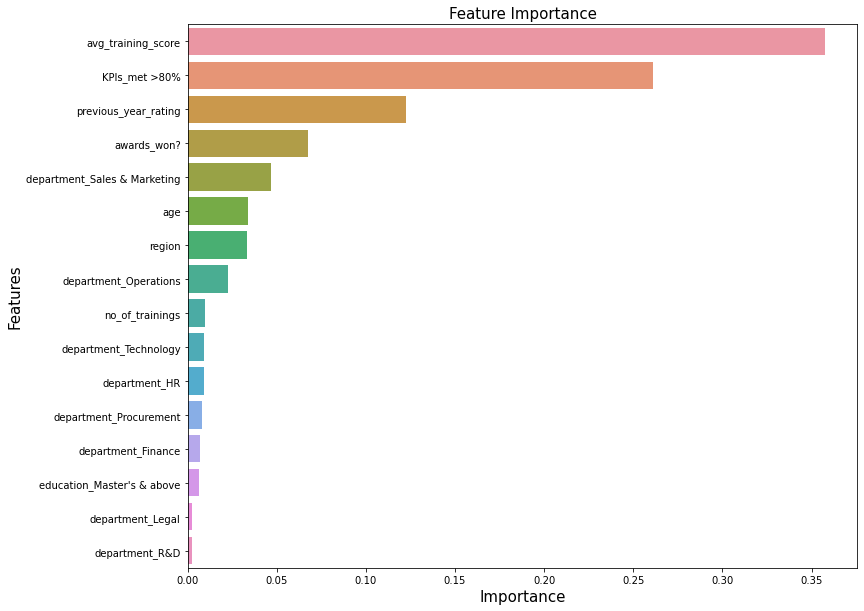

In [164]:
important_features = pd.DataFrame({'Features': X_train.drop('length_of_service',axis=1).columns, 'Importance': rfc.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15) 
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15) 
plt.show()

In [115]:
R1_ot=R1_ot.append({ 'Model':'RandomForest','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)
R1_ot

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.717218,0.178936,0.749094,0.690689,0.177514,0.515430
1,Decisiontree,0.810148,0.226011,0.903553,0.732409,0.262648,0.592648
2,RandomForest,0.800412,0.217056,0.897027,0.720002,0.247971,0.601092


In [165]:
gbc = GradientBoostingClassifier(n_estimators = 60,max_depth=6, random_state = 10)
xgbc = XGBClassifier(n_estimators=65,max_depth=5,random_state = 10,gamma = 1,class_weight='balanced')


gbc.fit(X_train.drop('length_of_service',axis=1), y_train)
predictions =gbc.predict(X_test.drop('length_of_service',axis=1))
predictions_train=gbc.predict(X_train.drop('length_of_service',axis=1))

print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(gbc,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_train',np.std(scores)/np.mean(scores))

scores1=cross_val_score(gbc,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))

train accuracy : 0.9447673660888831
test accuracy : 0.9429544487015752
[[35051    25]
 [ 2094  1195]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     35076
           1       0.98      0.36      0.53      3289

    accuracy                           0.94     38365
   macro avg       0.96      0.68      0.75     38365
weighted avg       0.95      0.94      0.93     38365

[[15025    39]
 [  899   480]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15064
           1       0.92      0.35      0.51      1379

    accuracy                           0.94     16443
   macro avg       0.93      0.67      0.74     16443
weighted avg       0.94      0.94      0.93     16443

Train_roc_auc 0.6813097908997744
Test_roc_auc 0.6727446819121663
cross_val_f1_train 0.730229132795452
cross_val_varience_train 0.011513286947399533
cross_val_f1_test 0.7209569897281807
cross_val_varience_test 0.00

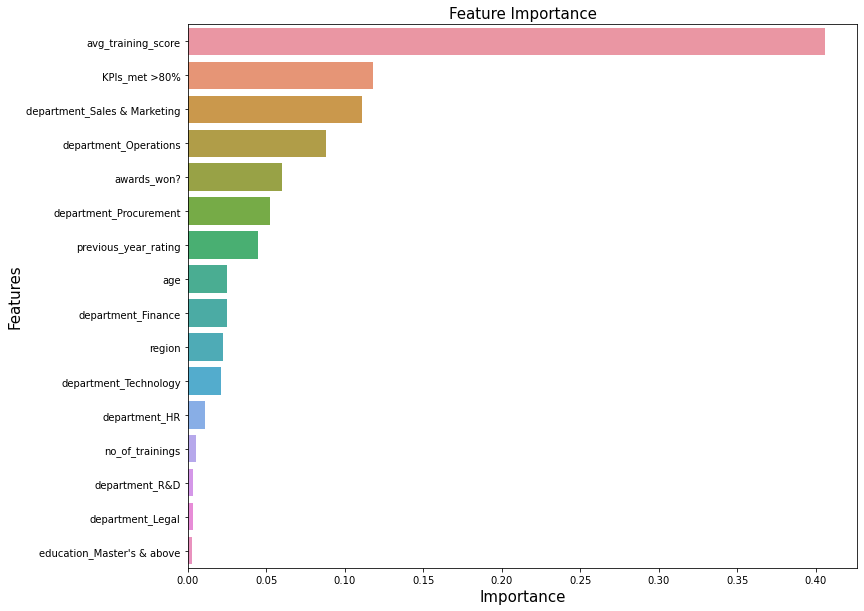

In [166]:
important_features = pd.DataFrame({'Features': X_train.drop('length_of_service',axis=1).columns, 'Importance': gbc.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15) 
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15) 
plt.show()

In [117]:
R1_ot=R1_ot.append({ 'Model':'Gradient','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)
R1_ot

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.717218,0.178936,0.749094,0.690689,0.177514,0.515430
1,Decisiontree,0.810148,0.226011,0.903553,0.732409,0.262648,0.592648
2,RandomForest,0.800412,0.217056,0.897027,0.720002,0.247971,0.601092
3,Gradient,0.672745,0.924855,0.348078,0.942954,0.482039,0.720957


In [167]:
xgbc = XGBClassifier(n_estimators=65,max_depth=5,random_state = 10,gamma = 1,class_weight='balanced')


xgbc.fit(X_train.drop('length_of_service',axis=1), y_train)
predictions =xgbc.predict(X_test.drop('length_of_service',axis=1))
predictions_train=xgbc.predict(X_train.drop('length_of_service',axis=1))

print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(xgbc,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_train',np.std(scores)/np.mean(scores))

scores1=cross_val_score(xgbc,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))

[16:01:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy : 0.9441157304835136
test accuracy : 0.9439275071458979
[[35040    36]
 [ 2108  1181]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     35076
           1       0.97      0.36      0.52      3289

   

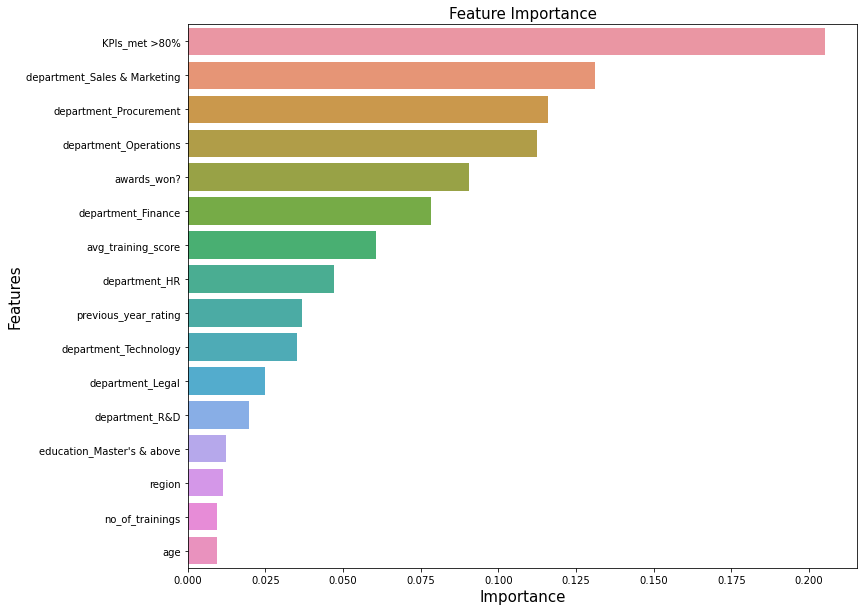

In [168]:
important_features = pd.DataFrame({'Features': X_train.drop('length_of_service',axis=1).columns, 'Importance': xgbc.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15) 
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15) 
plt.show()

In [119]:
R1_ot=R1_ot.append({ 'Model':'XGBoost','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)
R1_ot

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.717218,0.178936,0.749094,0.690689,0.177514,0.515430
1,Decisiontree,0.810148,0.226011,0.903553,0.732409,0.262648,0.592648
2,RandomForest,0.800412,0.217056,0.897027,0.720002,0.247971,0.601092
3,Gradient,0.672745,0.924855,0.348078,0.942954,0.482039,0.720957
4,XGBoost,0.677558,0.931947,0.357505,0.943928,0.493203,0.730644


In [169]:
from mlxtend.classifier import StackingClassifier
clf_stack = StackingClassifier(classifiers =[xgbc,rfc,lr1], meta_classifier = lr, use_probas = True, use_features_in_secondary = True)

clf_stack.fit(X_train, y_train)  
predictions = clf_stack.predict(X_test)
predictions_train=clf_stack.predict(X_train)

print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('train cohen score',metrics.cohen_kappa_score(y_train, predictions_train))
print('test cohen score',metrics.cohen_kappa_score(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(clf_stack,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_train',np.std(scores)/np.mean(scores))

scores1=cross_val_score(clf_stack,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))

[16:02:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:02:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy : 0.7566010686823929
test accuracy : 0.744632974518032
[[26240  8836]
 [  502  2787]]
              precision    recall  f1-score   support

           0       0.98      0.75      0.85     35076
           1       0.24      0.85      0.37      3289

    

In [122]:
R1_ot=R1_ot.append({ 'Model':'Stacking','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)
R1_ot

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.717218,0.178936,0.749094,0.690689,0.177514,0.515430
1,Decisiontree,0.810148,0.226011,0.903553,0.732409,0.262648,0.592648
2,RandomForest,0.800412,0.217056,0.897027,0.720002,0.247971,0.601092
3,Gradient,0.672745,0.924855,0.348078,0.942954,0.482039,0.720957
4,XGBoost,0.677558,0.931947,0.357505,0.943928,0.493203,0.730644
5,Stacking,0.807107,0.220000,0.909355,0.722009,0.253462,0.630581


In [71]:
from sklearn.model_selection import GridSearchCV

In [ ]:
o

In [212]:
tuned_paramaters = [{'n_estimators':[81,82,83,84,85],'max_depth': [11,12,13],'max_leaf_nodes':[3,7,10,15,20],'min_samples_leaf':[10,15,20,25]}]

lr1 = LogisticRegression(class_weight='balanced',n_jobs=6) 
dt = DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=9)
rfc=RandomForestClassifier(class_weight='balanced')
xgbc = XGBClassifier(random_state = 10,class_weight='balanced')

tree_grid = GridSearchCV(estimator = rfc, param_grid = tuned_paramaters, cv = 5)

tree_grid_model = tree_grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'max_depth': 12, 'max_leaf_nodes': 3, 'min_samples_leaf': 25, 'n_estimators': 81} 



In [214]:
tuned_paramaters = [{'n_estimators':[81,82,83,84,85],'max_depth': [11,12,13],'max_leaf_nodes':[3,7,10,15,20],'min_samples_leaf':[10,15,20,25]}]

lr1 = LogisticRegression(class_weight='balanced',n_jobs=6) 
dt = DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=9)
rfc=RandomForestClassifier(class_weight='balanced')
xgbc = XGBClassifier(random_state = 10,class_weight='balanced')

tree_grid = GridSearchCV(estimator = xgbc, param_grid = tuned_paramaters, cv = 5)

tree_grid_model = tree_grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

[21:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[21:57:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:57:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[21:57:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:57:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:57:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[21:57:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:57:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:57:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[21:57:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:57:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:57:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[21:58:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:58:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:58:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[21:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:58:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[21:58:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:58:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:58:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[21:59:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:59:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[21:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[21:59:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:59:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[21:59:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:59:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:00:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:00:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:00:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:00:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:00:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:00:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:01:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:01:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:01:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:01:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:01:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:02:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:02:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:02:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:02:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:03:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:03:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:03:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:03:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:03:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:03:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:03:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:03:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:04:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:04:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:04:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:04:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:04:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:04:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:05:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:05:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:05:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:05:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:05:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:05:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:06:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:06:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:06:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:06:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:06:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:07:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:07:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:07:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:07:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:07:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:07:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:07:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:07:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:08:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:08:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:08:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:08:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:08:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:08:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:08:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:09:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:09:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:09:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:09:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:09:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:09:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:09:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:10:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:10:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:10:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:10:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:10:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:10:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:10:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:11:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:11:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:11:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:11:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:11:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:12:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:12:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:12:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:12:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:12:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:12:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:12:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:12:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:12:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:13:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:13:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:13:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:13:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:13:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:13:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:14:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:14:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:14:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:14:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:14:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:14:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:15:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:15:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:15:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:15:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:15:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:15:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:15:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:15:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:15:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:16:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:16:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:16:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:16:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:16:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:16:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:16:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:17:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:17:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:17:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:17:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:17:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:17:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:17:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:17:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:17:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:18:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:18:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:19:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:19:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:19:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:19:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:19:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:20:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:20:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:20:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:20:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:20:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:20:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:20:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:21:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:21:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:21:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:21:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:21:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:21:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:21:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:21:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:21:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:22:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:22:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:22:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:22:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:22:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:22:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:22:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:22:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:23:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:23:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:23:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:23:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:23:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:23:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:23:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:24:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:24:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:24:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:24:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:24:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:24:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:24:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:24:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:24:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:25:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:25:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:25:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:25:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:25:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:26:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:26:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:26:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:26:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:26:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:26:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:26:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:26:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:26:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:27:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:27:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:28:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:28:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:28:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:28:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:28:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:28:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:29:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:29:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:29:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:29:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:29:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:29:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:30:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:30:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:30:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:30:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:30:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:30:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:30:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:30:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:31:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:31:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:32:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:32:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:32:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:32:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:32:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:32:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:32:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:32:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:33:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:33:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:33:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:33:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:33:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:33:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:34:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:34:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:34:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:34:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:34:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:34:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:34:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:34:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:34:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:35:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:35:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:35:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:35:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:35:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:35:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:36:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:36:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:36:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:36:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:37:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:37:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:37:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:37:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:38:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:38:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:38:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:38:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:38:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:38:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:38:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:38:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:38:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:39:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:39:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

[22:39:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:39:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some

In [213]:
rfc=RandomForestClassifier(n_estimators=81,max_depth=12,min_samples_leaf=25,max_leaf_nodes=3,criterion='entropy',class_weight='balanced')

rfc.fit(X_train.drop('length_of_service',axis=1), y_train)
predictions =rfc.predict(X_test.drop('length_of_service',axis=1))
predictions_train=rfc.predict(X_train.drop('length_of_service',axis=1))

print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(rfc,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_train',np.std(scores)/np.mean(scores))

scores1=cross_val_score(rfc,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))

train accuracy : 0.6845562361527434
test accuracy : 0.678890713373472
[[23671 11405]
 [  697  2592]]
              precision    recall  f1-score   support

           0       0.97      0.67      0.80     35076
           1       0.19      0.79      0.30      3289

    accuracy                           0.68     38365
   macro avg       0.58      0.73      0.55     38365
weighted avg       0.90      0.68      0.75     38365

[[10087  4977]
 [  303  1076]]
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     15064
           1       0.18      0.78      0.29      1379

    accuracy                           0.68     16443
   macro avg       0.57      0.72      0.54     16443
weighted avg       0.90      0.68      0.75     16443

Train_roc_auc 0.7314651916330507
Test_roc_auc 0.7249426137144798
cross_val_f1_train 0.5531817431318897
cross_val_varience_train 0.013387699587589745
cross_val_f1_test 0.541598597394141
cross_val_varience_test 0.005

In [221]:
xgbc = XGBClassifier(n_estimators=82,max_depth=6,max_leaf_nodes=3,min_samples_leaf=10,random_state = 10,class_weight='balanced')


xgbc.fit(X_train.drop('length_of_service',axis=1), y_train)
predictions =xgbc.predict(X_test.drop('length_of_service',axis=1))
predictions_train=xgbc.predict(X_train.drop('length_of_service',axis=1))

print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(xgbc,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_train',np.std(scores)/np.mean(scores))

scores1=cross_val_score(xgbc,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))

[22:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy : 0.9474521047830053
test accuracy : 0.9423462871738734
[[35049    27]
 [ 1989  1300]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     35076
           1       0

# SMOTE

In [123]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [124]:
print(sum(y_train_res == 1))
print(sum(y_train_res == 0))

35076
35076


In [125]:
lr1 = LogisticRegression(class_weight='balanced',n_jobs=6)
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, predictions))

[[10851  4213]
 [  144  1235]]
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     15064
           1       0.17      0.66      0.27      1379

    accuracy                           0.69     16443
   macro avg       0.56      0.68      0.54     16443
weighted avg       0.89      0.69      0.76     16443



In [126]:
X_train_res.head()

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Master's & above
0,12343,1,58.0,5.0,6.0,0,0,59,0,0,0,1,0,0,0,0,0
1,292,1,27.0,1.0,4.0,0,0,56,0,0,0,1,0,0,0,0,0
2,2808,1,41.0,4.0,20.0,0,0,49,0,0,0,0,0,0,1,0,0
3,819,1,35.0,4.0,4.0,0,0,49,0,0,0,0,0,0,1,0,1
4,12343,1,40.0,5.0,10.0,1,0,78,0,0,0,0,0,0,0,1,1


In [127]:
lr1 = LogisticRegression(class_weight='balanced',n_jobs=6)
dt = DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=12)
rfc=RandomForestClassifier(n_estimators=80,max_depth=11,criterion='entropy',class_weight='balanced')
gnb=GaussianNB()
gbc = GradientBoostingClassifier(n_estimators = 60,max_depth=6, random_state = 10)
abc = AdaBoostClassifier( n_estimators=50,random_state = 10)
xgbc = XGBClassifier(n_estimators=65,max_depth=5,random_state = 10,gamma = 1)

lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
predictions_train=lr1.predict(X_train)
print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))
print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(lr1,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_train',np.std(scores)/np.mean(scores))

scores1=cross_val_score(lr1,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))

train accuracy : 0.6954776488987359
test accuracy : 0.6947637292464879
[[24526 10550]
 [ 1133  2156]]
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     35076
           1       0.17      0.66      0.27      3289

    accuracy                           0.70     38365
   macro avg       0.56      0.68      0.54     38365
weighted avg       0.89      0.70      0.76     38365

[[10512  4552]
 [  467   912]]
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     15064
           1       0.17      0.66      0.27      1379

    accuracy                           0.69     16443
   macro avg       0.56      0.68      0.54     16443
weighted avg       0.89      0.69      0.76     16443

Train_roc_auc 0.6773714678227611
Test_roc_auc 0.679585713476982
cross_val_f1_train 0.549191568101971
cross_val_varience_train 0.017118365973102255
cross_val_f1_test 0.5154296892109439
cross_val_varience_test 0.055

In [128]:
R2= pd.DataFrame(columns=['Model','AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score', 'Kappa Score', 'f1_macro'])
   
R2=R2.append({ 'Model':'Logistic','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)


In [129]:
R2

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.679586,0.166911,0.661349,0.694764,0.153128,0.51543


In [130]:
dt = DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=8)

dt.fit(X_train_res, y_train_res.ravel())
predictions = dt.predict(X_test)
predictions_train=dt.predict(X_train)
predictions_train_res=dt.predict(X_train_res)

print('train_smote accuracy :', accuracy_score(y_train_res, predictions_train_res))
print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train_res, predictions_train_res))
print(classification_report(y_train_res, predictions_train_res))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('train cohen score',metrics.cohen_kappa_score(y_train, predictions_train))
print('test cohen score',metrics.cohen_kappa_score(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(dt,X_train,y_train,cv=4,scoring='f1_macro')
print(np.mean(scores))
print(np.std(scores)/np.mean(scores))

scores1=cross_val_score(dt,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))

train_smote accuracy : 0.8505673394913901
train accuracy : 0.8223641339762805
test accuracy : 0.8172474609256218
[[29743  5333]
 [ 5150 29926]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     35076
           1       0.85      0.85      0.85     35076

    accuracy                           0.85     70152
   macro avg       0.85      0.85      0.85     70152
weighted avg       0.85      0.85      0.85     70152

[[29743  5333]
 [ 1482  1807]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     35076
           1       0.25      0.55      0.35      3289

    accuracy                           0.82     38365
   macro avg       0.60      0.70      0.62     38365
weighted avg       0.89      0.82      0.85     38365

[[12689  2375]
 [  630   749]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89     15064
           1       0.24      0.

In [131]:
R2=R2.append({ 'Model':'Decisiontree','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)
R2

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.679586,0.166911,0.661349,0.694764,0.153128,0.515430
1,Decisiontree,0.692743,0.239757,0.543147,0.817247,0.244787,0.573626


In [132]:
rfc=RandomForestClassifier(n_estimators=75,max_depth=11,criterion='entropy',class_weight='balanced')
gbc = GradientBoostingClassifier(n_estimators = 60,max_depth=6, random_state = 10)
xgbc = XGBClassifier(n_estimators=65,max_depth=5,random_state = 10,gamma = 1)

rfc.fit(X_train_res, y_train_res.ravel())
predictions = rfc.predict(X_test)
predictions_train=rfc.predict(X_train)
predictions_train_res=rfc.predict(X_train_res)

print('train_smote accuracy :', accuracy_score(y_train_res, predictions_train_res))
print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train_res, predictions_train_res))
print(classification_report(y_train_res, predictions_train_res))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('train cohen score',metrics.cohen_kappa_score(y_train, predictions_train))
print('test cohen score',metrics.cohen_kappa_score(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(rfc,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print(np.std(scores)/np.mean(scores))

scores1=cross_val_score(rfc,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))


train_smote accuracy : 0.9072870338693123
train accuracy : 0.8608367001172944
test accuracy : 0.8501489995742869
[[30828  4248]
 [ 2256 32820]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     35076
           1       0.89      0.94      0.91     35076

    accuracy                           0.91     70152
   macro avg       0.91      0.91      0.91     70152
weighted avg       0.91      0.91      0.91     70152

[[30828  4248]
 [ 1091  2198]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     35076
           1       0.34      0.67      0.45      3289

    accuracy                           0.86     38365
   macro avg       0.65      0.77      0.69     38365
weighted avg       0.91      0.86      0.88     38365

[[13127  1937]
 [  527   852]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     15064
           1       0.31      0.

In [133]:
R2=R2.append({ 'Model':'Randomforest','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)
R2

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.679586,0.166911,0.661349,0.694764,0.153128,0.515430
1,Decisiontree,0.692743,0.239757,0.543147,0.817247,0.244787,0.573626
2,Randomforest,0.744627,0.305486,0.617839,0.850149,0.334090,0.614655


In [141]:
gbc = GradientBoostingClassifier(n_estimators = 55,max_depth=6, random_state = 10)
xgbc = XGBClassifier(n_estimators=65,max_depth=5,random_state = 10,gamma = 1)

gbc.fit(X_train_res, y_train_res.ravel())
predictions = gbc.predict(X_test)
predictions_train=gbc.predict(X_train)
predictions_train_res=gbc.predict(X_train_res)

print('train_smote accuracy :', accuracy_score(y_train_res, predictions_train_res))
print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))
print('')
print('synthasized data')
print(confusion_matrix(y_train_res, predictions_train_res))
print(classification_report(y_train_res, predictions_train_res))
print('train data without smote')
print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))
print('test data without smote')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('train cohen score',metrics.cohen_kappa_score(y_train, predictions_train))
print('test cohen score',metrics.cohen_kappa_score(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(gbc,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print(np.std(scores)/np.mean(scores))

scores1=cross_val_score(gbc,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))


train_smote accuracy : 0.9289685254875129
train accuracy : 0.9108823146096703
test accuracy : 0.9081676093170346

synthasized data
[[33372  1704]
 [ 3279 31797]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     35076
           1       0.95      0.91      0.93     35076

    accuracy                           0.93     70152
   macro avg       0.93      0.93      0.93     70152
weighted avg       0.93      0.93      0.93     70152

train data without smote
[[33372  1704]
 [ 1715  1574]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     35076
           1       0.48      0.48      0.48      3289

    accuracy                           0.91     38365
   macro avg       0.72      0.71      0.72     38365
weighted avg       0.91      0.91      0.91     38365

test data without smote
[[14307   757]
 [  753   626]]
              precision    recall  f1-score   support

           0      

In [135]:
R2=R2.append({ 'Model':'Gradient','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)
R2

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.679586,0.166911,0.661349,0.694764,0.153128,0.515430
1,Decisiontree,0.692743,0.239757,0.543147,0.817247,0.244787,0.573626
2,Randomforest,0.744627,0.305486,0.617839,0.850149,0.334090,0.614655
3,Gradient,0.701850,0.452639,0.453952,0.908168,0.403169,0.718985


In [136]:
xgbc = XGBClassifier(n_estimators=65,max_depth=5,random_state = 10,gamma = 1)

xgbc.fit(X_train_res, y_train_res.ravel())
predictions = xgbc.predict(X_test)
predictions_train=xgbc.predict(X_train)
predictions_train_res=xgbc.predict(X_train_res)

print('train_smote accuracy :', accuracy_score(y_train_res, predictions_train_res))
print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train_res, predictions_train_res))
print(classification_report(y_train_res, predictions_train_res))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('train cohen score',metrics.cohen_kappa_score(y_train, predictions_train))
print('test cohen score',metrics.cohen_kappa_score(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(xgbc,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print(np.std(scores)/np.mean(scores))

scores1=cross_val_score(xgbc,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))


[12:52:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train_smote accuracy : 0.9581052571558901
train accuracy : 0.938772318519484
test accuracy : 0.9346834519248313
[[34716   360]
 [ 2579 32497]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     35076
           1       0.99      0.93      0.96     35076

    accuracy                           0.96     70152
   macro avg       0.96      0.96      0.96     70152
weighted avg       0.96      0.96      0.96     70152

[[34716   360]
 [ 1989  1300]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     35076
           1       0.78      0.40      0.53      3289

    accuracy             

In [137]:
R2=R2.append({ 'Model':'XGBoost','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)
R2

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.679586,0.166911,0.661349,0.694764,0.153128,0.515430
1,Decisiontree,0.692743,0.239757,0.543147,0.817247,0.244787,0.573626
2,Randomforest,0.744627,0.305486,0.617839,0.850149,0.334090,0.614655
3,Gradient,0.701850,0.452639,0.453952,0.908168,0.403169,0.718985
4,XGBoost,0.677124,0.715092,0.367658,0.934683,0.454567,0.730644


In [138]:
from mlxtend.classifier import StackingClassifier

clf_stack = StackingClassifier(classifiers =[xgbc,rfc,lr1], meta_classifier = lr, use_probas = True, use_features_in_secondary = True)
clf_stack.fit(X_train_res, y_train_res.ravel())  
predictions = clf_stack.predict(X_test)
predictions_train=clf_stack.predict(X_train)

print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))\

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('train cohen score',metrics.cohen_kappa_score(y_train, predictions_train))
print('test cohen score',metrics.cohen_kappa_score(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(clf_stack,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print(np.std(scores)/np.mean(scores))

scores1=cross_val_score(clf_stack,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))


[12:52:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy : 0.8623224292975368
test accuracy : 0.8547710271848203
[[31126  3950]
 [ 1332  1957]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92     35076
           1       0.33      0.60      0.43      3289

    accuracy                           0.86     38365
   macro avg       0.65      0.74      0.67     38365
weighted avg       0.91      0.86      0.88     38365

[[13268  1796]
 [  592   787]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     15064
           1       0.30      0.57      0.40      1379

    accuracy                           0.85     16443
   macro avg

In [139]:
R2=R2.append({ 'Model':'Stacking','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)
R2

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.679586,0.166911,0.661349,0.694764,0.153128,0.515430
1,Decisiontree,0.692743,0.239757,0.543147,0.817247,0.244787,0.573626
2,Randomforest,0.744627,0.305486,0.617839,0.850149,0.334090,0.614655
3,Gradient,0.701850,0.452639,0.453952,0.908168,0.403169,0.718985
4,XGBoost,0.677124,0.715092,0.367658,0.934683,0.454567,0.730644
5,Stacking,0.725739,0.304684,0.570703,0.854771,0.323273,0.619360


# outlier treatment for SMOTE data

In [142]:
col=['age','previous_year_rating','length_of_service','avg_training_score']

In [143]:
col=['age','previous_year_rating','length_of_service','avg_training_score']
for i in col:
    q3=X_train_res[i].quantile(0.75)
    q1=X_train_res[i].quantile(0.25)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    uc=X_train_res[i].quantile(0.99)
    lc=X_train_res[i].quantile(0.01)
    
    for j in X_train_res[i].index:
        if X_train_res.loc[j,i]>ub:
            X_train_res.loc[j,i]=uc
        if X_train_res.loc[j,i]<lb:
            X_train_res.loc[j,i]=lc

In [144]:
lr1 = LogisticRegression(class_weight='balanced',n_jobs=6)

lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
predictions_train=lr1.predict(X_train)
predictions_train_res=lr1.predict(X_train_res)

print('train_smote accuracy :', accuracy_score(y_train_res, predictions_train_res))
print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train_res, predictions_train_res))
print(classification_report(y_train_res, predictions_train_res))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('train cohen score',metrics.cohen_kappa_score(y_train, predictions_train))
print('test cohen score',metrics.cohen_kappa_score(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(lr1,X_train,y_train,cv=4,scoring='f1_macro')
print(np.mean(scores))
print(np.std(scores)/np.mean(scores))

scores1=cross_val_score(lr1,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))


train_smote accuracy : 0.718924620823355
train accuracy : 0.6444154828619836
test accuracy : 0.641853676336435
[[22481 12595]
 [ 7123 27953]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.70     35076
           1       0.69      0.80      0.74     35076

    accuracy                           0.72     70152
   macro avg       0.72      0.72      0.72     70152
weighted avg       0.72      0.72      0.72     70152

[[22449 12627]
 [ 1015  2274]]
              precision    recall  f1-score   support

           0       0.96      0.64      0.77     35076
           1       0.15      0.69      0.25      3289

    accuracy                           0.64     38365
   macro avg       0.55      0.67      0.51     38365
weighted avg       0.89      0.64      0.72     38365

[[9581 5483]
 [ 406  973]]
              precision    recall  f1-score   support

           0       0.96      0.64      0.76     15064
           1       0.15      0.71    

In [145]:
R2_ot= pd.DataFrame(columns=['Model','AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score', 'Kappa Score', 'f1_macro'])
   
R2_ot=R2_ot.append({ 'Model':'Logistic','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)


In [146]:
R2_ot

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.670802,0.150713,0.705584,0.641854,0.127831,0.51543


In [147]:
dt = DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=10)

dt.fit(X_train_res, y_train_res.ravel())
predictions = dt.predict(X_test)
predictions_train=dt.predict(X_train)
predictions_train_res=dt.predict(X_train_res)

print('train_smote accuracy :', accuracy_score(y_train_res, predictions_train_res))
print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train_res, predictions_train_res))
print(classification_report(y_train_res, predictions_train_res))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('train cohen score',metrics.cohen_kappa_score(y_train, predictions_train))
print('test cohen score',metrics.cohen_kappa_score(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(dt,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_test',np.std(scores)/np.mean(scores))

scores1=cross_val_score(dt,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))


train_smote accuracy : 0.8756414642490592
train accuracy : 0.8781962726443373
test accuracy : 0.8713130207383081
[[31886  3190]
 [ 5534 29542]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     35076
           1       0.90      0.84      0.87     35076

    accuracy                           0.88     70152
   macro avg       0.88      0.88      0.88     70152
weighted avg       0.88      0.88      0.88     70152

[[31886  3190]
 [ 1483  1806]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     35076
           1       0.36      0.55      0.44      3289

    accuracy                           0.88     38365
   macro avg       0.66      0.73      0.68     38365
weighted avg       0.90      0.88      0.89     38365

[[13604  1460]
 [  656   723]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     15064
           1       0.33      0.

In [148]:
R2_ot=R2_ot.append({ 'Model':'Decisiontree','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)


In [149]:
R2_ot

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.670802,0.150713,0.705584,0.641854,0.127831,0.515430
1,Decisiontree,0.713687,0.331196,0.524293,0.871313,0.337890,0.589313


In [150]:
rfc=RandomForestClassifier(n_estimators=70,max_depth=12,criterion='entropy',class_weight='balanced')

rfc.fit(X_train_res, y_train_res.ravel())
predictions = rfc.predict(X_test)
predictions_train=rfc.predict(X_train)
predictions_train_res=rfc.predict(X_train_res)

print('train_smote accuracy :', accuracy_score(y_train_res, predictions_train_res))
print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train_res, predictions_train_res))
print(classification_report(y_train_res, predictions_train_res))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('train cohen score',metrics.cohen_kappa_score(y_train, predictions_train))
print('test cohen score',metrics.cohen_kappa_score(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(rfc,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_test',np.std(scores)/np.mean(scores))

scores1=cross_val_score(rfc,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))


train_smote accuracy : 0.9158113810012544
train accuracy : 0.8745471132542683
test accuracy : 0.8601836647813659
[[31404  3672]
 [ 2234 32842]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     35076
           1       0.90      0.94      0.92     35076

    accuracy                           0.92     70152
   macro avg       0.92      0.92      0.92     70152
weighted avg       0.92      0.92      0.92     70152

[[31402  3674]
 [ 1139  2150]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     35076
           1       0.37      0.65      0.47      3289

    accuracy                           0.87     38365
   macro avg       0.67      0.77      0.70     38365
weighted avg       0.91      0.87      0.89     38365

[[13344  1720]
 [  579   800]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92     15064
           1       0.32      0.

In [151]:
R2_ot=R2_ot.append({ 'Model':'RandomForest','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)
R2_ot

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.670802,0.150713,0.705584,0.641854,0.127831,0.515430
1,Decisiontree,0.713687,0.331196,0.524293,0.871313,0.337890,0.589313
2,RandomForest,0.732976,0.317460,0.580131,0.860184,0.338668,0.627356


In [152]:
gbc = GradientBoostingClassifier(n_estimators = 60,max_depth=6, random_state = 10)

gbc.fit(X_train_res, y_train_res.ravel())
predictions = gbc.predict(X_test)
predictions_train=gbc.predict(X_train)
predictions_train_res=gbc.predict(X_train_res)

print('train_smote accuracy :', accuracy_score(y_train_res, predictions_train_res))
print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train_res, predictions_train_res))
print(classification_report(y_train_res, predictions_train_res))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('train cohen score',metrics.cohen_kappa_score(y_train, predictions_train))
print('test cohen score',metrics.cohen_kappa_score(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(gbc,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_test',np.std(scores)/np.mean(scores))

scores1=cross_val_score(gbc,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))


train_smote accuracy : 0.9336298323640095
train accuracy : 0.9142968851818063
test accuracy : 0.911390865413854
[[33546  1530]
 [ 3126 31950]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     35076
           1       0.95      0.91      0.93     35076

    accuracy                           0.93     70152
   macro avg       0.93      0.93      0.93     70152
weighted avg       0.93      0.93      0.93     70152

[[33546  1530]
 [ 1758  1531]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     35076
           1       0.50      0.47      0.48      3289

    accuracy                           0.91     38365
   macro avg       0.73      0.71      0.72     38365
weighted avg       0.91      0.91      0.91     38365

[[14383   681]
 [  776   603]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     15064
           1       0.47      0.4

In [153]:
R2_ot=R2_ot.append({ 'Model':'Gradient','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)
R2_ot

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.670802,0.150713,0.705584,0.641854,0.127831,0.515430
1,Decisiontree,0.713687,0.331196,0.524293,0.871313,0.337890,0.589313
2,RandomForest,0.732976,0.317460,0.580131,0.860184,0.338668,0.627356
3,Gradient,0.696033,0.469626,0.437273,0.911391,0.404731,0.720957


In [154]:
xgbc = XGBClassifier(n_estimators=35,max_depth=3,random_state = 10)

xgbc.fit(X_train_res, y_train_res.ravel())
predictions = xgbc.predict(X_test)
predictions_train=xgbc.predict(X_train)
predictions_train_res=xgbc.predict(X_train_res)

print('train_smote accuracy :', accuracy_score(y_train_res, predictions_train_res))
print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train_res, predictions_train_res))
print(classification_report(y_train_res, predictions_train_res))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('train cohen score',metrics.cohen_kappa_score(y_train, predictions_train))
print('test cohen score',metrics.cohen_kappa_score(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(xgbc,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_test',np.std(scores)/np.mean(scores))

scores1=cross_val_score(xgbc,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))


[13:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train_smote accuracy : 0.9024546698597331
train accuracy : 0.8848950866675355
test accuracy : 0.8852399197226783
[[32240  2836]
 [ 4007 31069]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     35076
           1       0.92      0.89      0.90     35076

    accuracy                           0.90     70152
   macro avg       0.90      0.90      0.90     70152
weighted avg       0.90      0.90      0.90     70152

[[32240  2836]
 [ 1580  1709]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     35076
           1       0.38      0.52      0.44      3289

    accuracy            

In [155]:
R2_ot=R2_ot.append({ 'Model':'XGBoost','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)
R2_ot

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.670802,0.150713,0.705584,0.641854,0.127831,0.515430
1,Decisiontree,0.713687,0.331196,0.524293,0.871313,0.337890,0.589313
2,RandomForest,0.732976,0.317460,0.580131,0.860184,0.338668,0.627356
3,Gradient,0.696033,0.469626,0.437273,0.911391,0.404731,0.720957
4,XGBoost,0.719970,0.369476,0.521392,0.885240,0.370705,0.704693


In [156]:
from mlxtend.classifier import StackingClassifier
clf_stack = StackingClassifier(classifiers =[xgbc,rfc,lr1], meta_classifier = lr, use_probas = True, use_features_in_secondary = True)
clf_stack.fit(X_train_res, y_train_res.ravel())  
predictions = clf_stack.predict(X_test)
predictions_train=clf_stack.predict(X_train)

print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('train cohen score',metrics.cohen_kappa_score(y_train, predictions_train))
print('test cohen score',metrics.cohen_kappa_score(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(xgbc,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_test',np.std(scores)/np.mean(scores))

scores1=cross_val_score(xgbc,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))


[13:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy : 0.8754594031017855
test accuracy : 0.8727726084047923
[[31760  3316]
 [ 1462  1827]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     35076
           1       0.36      0.56      0.43      3289

    accuracy                           0.88     38365
   macro avg       0.66      0.73      0.68     38365
weighted avg       0.90      0.88      0.89     38365

[[13608  1456]
 [  636   743]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     15064
           1       0.34      0.54      0.42      1379

    accuracy                           0.87     16443
   macro avg

In [157]:
R2_ot=R2_ot.append({ 'Model':'Stacking','AUC Score' : metrics.roc_auc_score(y_test,predictions),'Precision Score': metrics.precision_score(y_test,predictions), 
               'Recall Score': metrics.recall_score(y_test,predictions),'Accuracy Score': metrics.accuracy_score(y_test,predictions), 
               'Kappa Score':metrics.cohen_kappa_score(y_test,predictions), 'f1_macro': avg_f1}, ignore_index=True)
R2_ot

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro
0,Logistic,0.670802,0.150713,0.705584,0.641854,0.127831,0.515430
1,Decisiontree,0.713687,0.331196,0.524293,0.871313,0.337890,0.589313
2,RandomForest,0.732976,0.317460,0.580131,0.860184,0.338668,0.627356
3,Gradient,0.696033,0.469626,0.437273,0.911391,0.404731,0.720957
4,XGBoost,0.719970,0.369476,0.521392,0.885240,0.370705,0.704693
5,Stacking,0.721071,0.337881,0.538796,0.872773,0.348116,0.704693


In [ ]:
o

In [210]:
tuned_paramaters = [{'n_estimators':[81,82,83,84,85],'max_depth': [11,12,13],'max_leaf_nodes':[3,7,10,15,20],'min_samples_leaf':[10,15,20,25]}]

lr1 = LogisticRegression(class_weight='balanced',n_jobs=6) 
dt = DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=9)
rfc=RandomForestClassifier(class_weight='balanced')
xgbc = XGBClassifier(random_state = 10,class_weight='balanced')

tree_grid = GridSearchCV(estimator = rfc, param_grid = tuned_paramaters, cv = 5)

tree_grid_model = tree_grid.fit(X_train_res, y_train_res.ravel())

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'max_depth': 12, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'n_estimators': 85} 



In [211]:
rfc=RandomForestClassifier(n_estimators=85,max_depth=12,max_leaf_nodes=20,min_samples_leaf=20,criterion='entropy',class_weight='balanced')

rfc.fit(X_train_res, y_train_res.ravel())
predictions = rfc.predict(X_test)
predictions_train=rfc.predict(X_train)
predictions_train_res=rfc.predict(X_train_res)

print('train_smote accuracy :', accuracy_score(y_train_res, predictions_train_res))
print('train accuracy :', accuracy_score(y_train,predictions_train))
print('test accuracy :', accuracy_score(y_test,predictions))

print(confusion_matrix(y_train_res, predictions_train_res))
print(classification_report(y_train_res, predictions_train_res))

print(confusion_matrix(y_train, predictions_train))
print(classification_report(y_train, predictions_train))

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('train cohen score',metrics.cohen_kappa_score(y_train, predictions_train))
print('test cohen score',metrics.cohen_kappa_score(y_test, predictions))

print('Train_roc_auc',roc_auc_score(y_train, predictions_train))
print('Test_roc_auc',roc_auc_score(y_test, predictions))

scores=cross_val_score(rfc,X_train,y_train,cv=4,scoring='f1_macro')
print('cross_val_f1_train',np.mean(scores))
print('cross_val_varience_test',np.std(scores)/np.mean(scores))

scores1=cross_val_score(rfc,X_test,y_test,cv=4,scoring='f1_macro')
avg_f1=np.mean(scores1)
print('cross_val_f1_test',np.mean(scores1))
print('cross_val_varience_test',np.std(scores1)/np.mean(scores1))

train_smote accuracy : 0.8365406545786293
train accuracy : 0.7923888961292845
test accuracy : 0.7874475460682357
[[28394  6682]
 [ 4785 30291]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83     35076
           1       0.82      0.86      0.84     35076

    accuracy                           0.84     70152
   macro avg       0.84      0.84      0.84     70152
weighted avg       0.84      0.84      0.84     70152

[[28394  6682]
 [ 1283  2006]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     35076
           1       0.23      0.61      0.33      3289

    accuracy                           0.79     38365
   macro avg       0.59      0.71      0.61     38365
weighted avg       0.89      0.79      0.83     38365

[[12098  2966]
 [  529   850]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     15064
           1       0.22      0.

In [171]:
R1['Description']=['without Smote','without Smote','without Smote','without Smote','without Smote']

In [172]:
R1

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro,Description
0,Logistic,0.722924,0.184215,0.749819,0.700541,0.186186,0.515430,without Smote
1,Decisiontree,0.807952,0.226689,0.895577,0.735024,0.263174,0.593178,without Smote
2,RandomForest,0.798906,0.210606,0.910080,0.706380,0.238305,0.588661,without Smote
3,Gradient,0.671131,0.935039,0.344453,0.943015,0.479962,0.720957,without Smote
4,XGBoost,0.673603,0.932302,0.349529,0.943319,0.484879,0.730644,without Smote


In [173]:
R1_ot['Description']=['without Smote&OutlierTreated','without Smote&OutlierTreated','without Smote&OutlierTreated','without Smote&OutlierTreated','without Smote&OutlierTreated','without Smote&OutlierTreated']
R1_ot

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro,Description
0,Logistic,0.717218,0.178936,0.749094,0.690689,0.177514,0.515430,without Smote&OutlierTreated
1,Decisiontree,0.810148,0.226011,0.903553,0.732409,0.262648,0.592648,without Smote&OutlierTreated
2,RandomForest,0.800412,0.217056,0.897027,0.720002,0.247971,0.601092,without Smote&OutlierTreated
3,Gradient,0.672745,0.924855,0.348078,0.942954,0.482039,0.720957,without Smote&OutlierTreated
4,XGBoost,0.677558,0.931947,0.357505,0.943928,0.493203,0.730644,without Smote&OutlierTreated
5,Stacking,0.807107,0.220000,0.909355,0.722009,0.253462,0.630581,without Smote&OutlierTreated


In [174]:
R2['Description']=['with Smote','with Smote','with Smote','with Smote','with Smote','with Smote']
R2

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro,Description
0,Logistic,0.679586,0.166911,0.661349,0.694764,0.153128,0.515430,with Smote
1,Decisiontree,0.692743,0.239757,0.543147,0.817247,0.244787,0.573626,with Smote
2,Randomforest,0.744627,0.305486,0.617839,0.850149,0.334090,0.614655,with Smote
3,Gradient,0.701850,0.452639,0.453952,0.908168,0.403169,0.718985,with Smote
4,XGBoost,0.677124,0.715092,0.367658,0.934683,0.454567,0.730644,with Smote
5,Stacking,0.725739,0.304684,0.570703,0.854771,0.323273,0.619360,with Smote


In [175]:
R2_ot['Description']=['with Smote&OutlierTreated','with Smote&OutlierTreated','with Smote&OutlierTreated','with Smote&OutlierTreated','with Smote&OutlierTreated','with Smote&OutlierTreated']
R2_ot

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro,Description
0,Logistic,0.670802,0.150713,0.705584,0.641854,0.127831,0.515430,with Smote&OutlierTreated
1,Decisiontree,0.713687,0.331196,0.524293,0.871313,0.337890,0.589313,with Smote&OutlierTreated
2,RandomForest,0.732976,0.317460,0.580131,0.860184,0.338668,0.627356,with Smote&OutlierTreated
3,Gradient,0.696033,0.469626,0.437273,0.911391,0.404731,0.720957,with Smote&OutlierTreated
4,XGBoost,0.719970,0.369476,0.521392,0.885240,0.370705,0.704693,with Smote&OutlierTreated
5,Stacking,0.721071,0.337881,0.538796,0.872773,0.348116,0.704693,with Smote&OutlierTreated


In [176]:
result=R1.append(R1_ot)

In [177]:
result=result.append(R2)

In [178]:
result=result.append(R2_ot)

In [179]:
result

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1_macro,Description
0,Logistic,0.722924,0.184215,0.749819,0.700541,0.186186,0.515430,without Smote
1,Decisiontree,0.807952,0.226689,0.895577,0.735024,0.263174,0.593178,without Smote
2,RandomForest,0.798906,0.210606,0.910080,0.706380,0.238305,0.588661,without Smote
3,Gradient,0.671131,0.935039,0.344453,0.943015,0.479962,0.720957,without Smote
4,XGBoost,0.673603,0.932302,0.349529,0.943319,0.484879,0.730644,without Smote
0,Logistic,0.717218,0.178936,0.749094,0.690689,0.177514,0.515430,without Smote&OutlierTreated
1,Decisiontree,0.810148,0.226011,0.903553,0.732409,0.262648,0.592648,without Smote&OutlierTreated
2,RandomForest,0.800412,0.217056,0.897027,0.720002,0.247971,0.601092,without Smote&OutlierTreated
3,Gradient,0.672745,0.924855,0.348078,0.942954,0.482039,0.720957,without Smote&OutlierTreated
4,XGBoost,0.677558,0.931947,0.357505,0.943928,0.493203,0.730644,without Smote&OutlierTreated


# Precision Check

Text(0.5, 1.0, 'without smote and outlier treated')

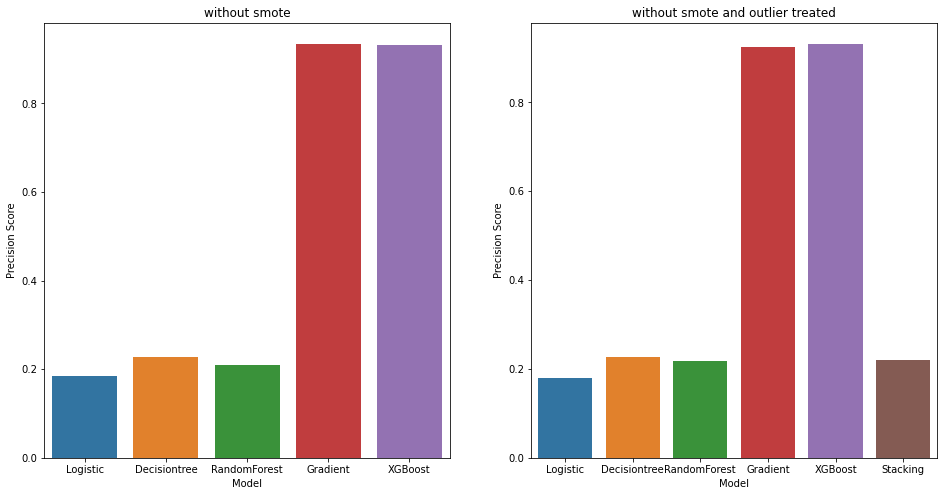

In [225]:
plt.subplot(1,2,1)
sns.barplot(data=R1,x='Model',y='Precision Score',orient='v')
plt.title('without smote')
plt.subplot(1,2,2)
sns.barplot(data=R1_ot,x='Model',y='Precision Score',orient='v')
plt.title('without smote and outlier treated')

Text(0.5, 1.0, 'with smote and outlier treated')

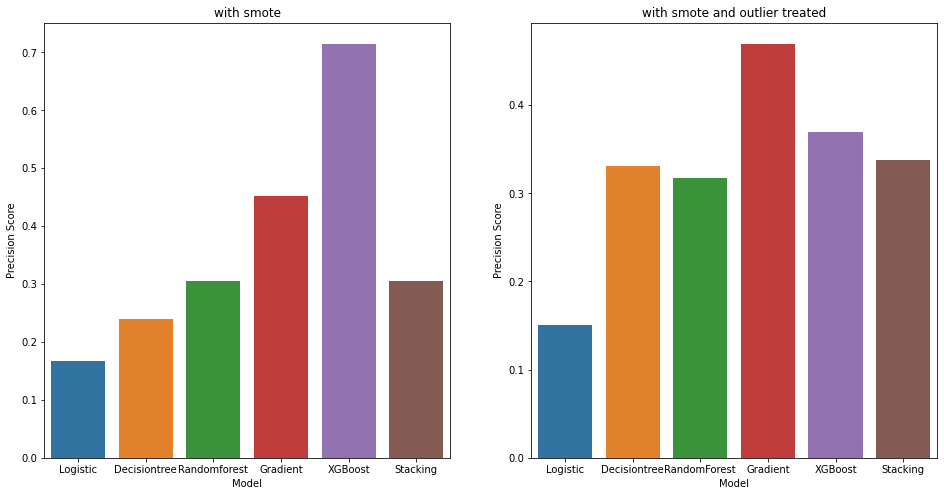

In [226]:
plt.subplot(1,2,1)
sns.barplot(data=R2,x='Model',y='Precision Score',orient='v')
plt.title('with smote')
plt.subplot(1,2,2)
sns.barplot(data=R2_ot,x='Model',y='Precision Score',orient='v')
plt.title('with smote and outlier treated')

# Recall check

In [213]:
plt.rcParams['figure.figsize']=[16,8]

Text(0.5, 1.0, 'without smote and outlier treated')

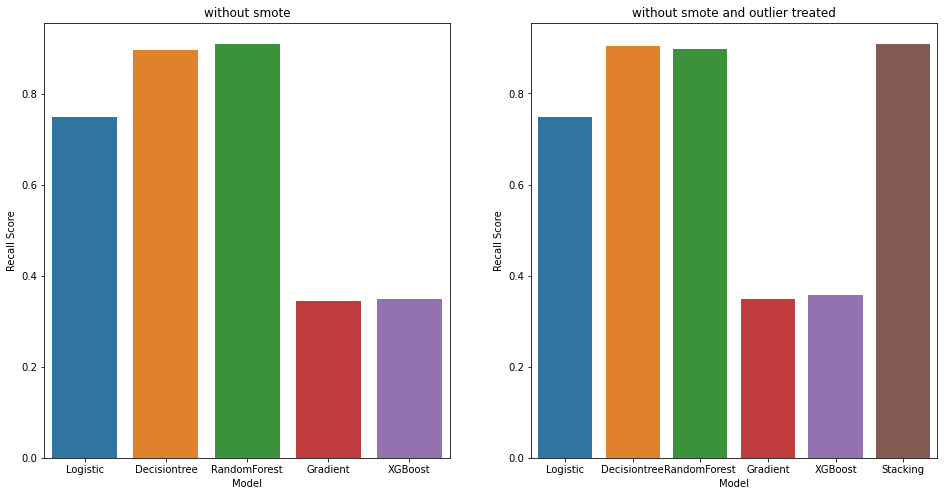

In [218]:
plt.subplot(1,2,1)
sns.barplot(data=R1,x='Model',y='Recall Score',orient='v')
plt.title('without smote')
plt.subplot(1,2,2)
sns.barplot(data=R1_ot,x='Model',y='Recall Score',orient='v')
plt.title('without smote and outlier treated')

Text(0.5, 1.0, 'with smote and outlier treated')

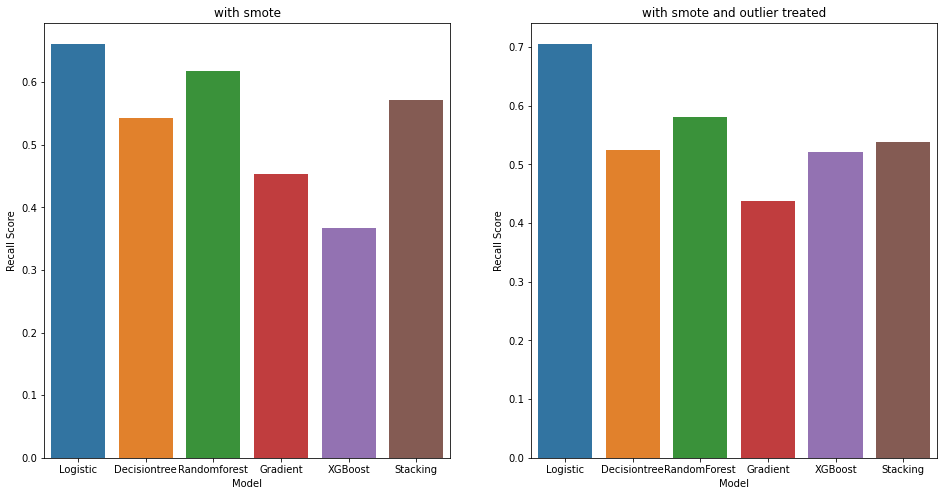

In [219]:
plt.subplot(1,2,1)
sns.barplot(data=R2,x='Model',y='Recall Score',orient='v')
plt.title('with smote')
plt.subplot(1,2,2)
sns.barplot(data=R2_ot,x='Model',y='Recall Score',orient='v')
plt.title('with smote and outlier treated')

# F1_Score Check

Text(0.5, 1.0, 'without smote and outlier treated')

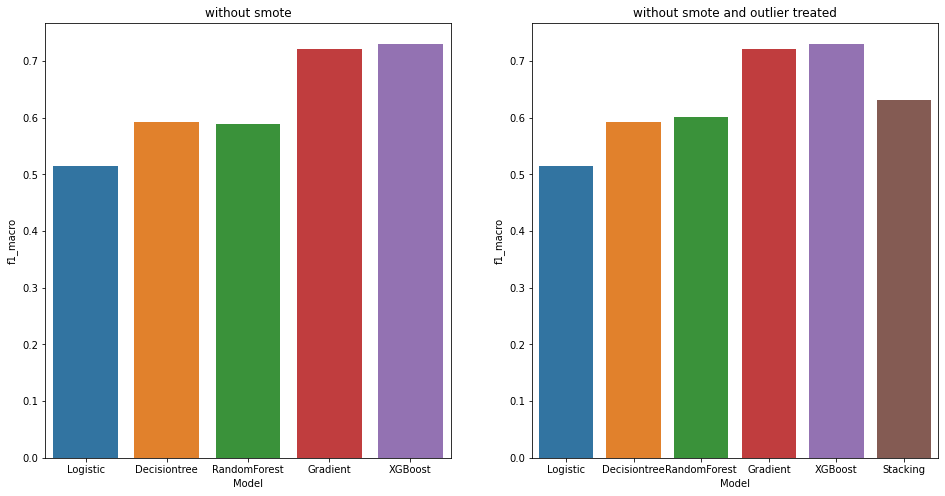

In [220]:
plt.subplot(1,2,1)
sns.barplot(data=R1,x='Model',y='f1_macro',orient='v')
plt.title('without smote')
plt.subplot(1,2,2)
sns.barplot(data=R1_ot,x='Model',y='f1_macro',orient='v')
plt.title('without smote and outlier treated')

Text(0.5, 1.0, 'with smote and outlier treated')

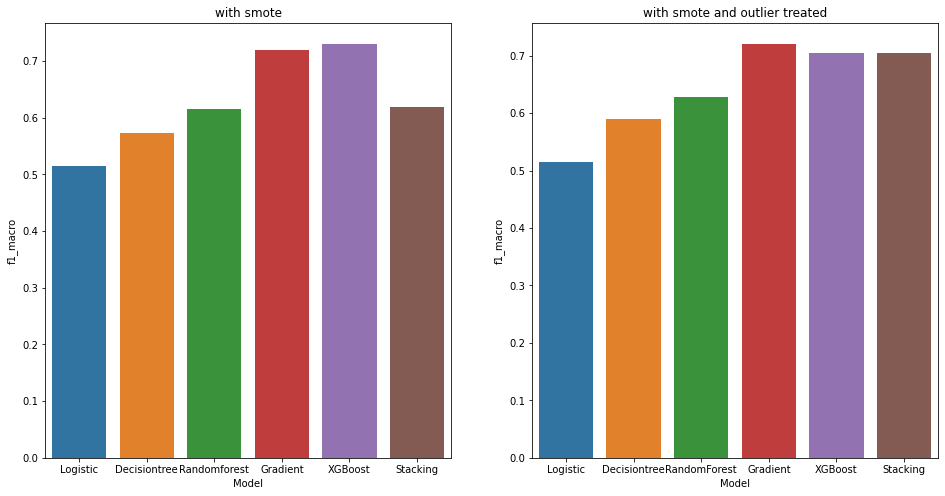

In [221]:
plt.subplot(1,2,1)
sns.barplot(data=R2,x='Model',y='f1_macro',orient='v')
plt.title('with smote')
plt.subplot(1,2,2)
sns.barplot(data=R2_ot,x='Model',y='f1_macro',orient='v')
plt.title('with smote and outlier treated')

# Model applying PCA

In [180]:
hr_n=hr_num.drop('no_of_trainings',axis=1)

In [181]:
hr_scaled.head()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,region,KPIs_met >80%,awards_won?,is_promoted,department_Finance,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,-0.415276,0.025598,1.395766,0.500460,-1.075931,4843,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
65141,-0.415276,-0.627135,1.395766,-0.437395,-0.253282,6428,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7513,-0.415276,-0.104948,-0.250651,0.265996,-1.001145,874,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2542,1.226063,0.547785,-1.897069,0.969387,-1.001145,1175,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
48945,-0.415276,1.331064,-0.250651,-0.906322,0.718939,2260,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [182]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.90,random_state=10)
components=pca.fit_transform(hr_scaled)

In [183]:
hr_pca=pd.DataFrame(data=components)

In [184]:
hr_pca=hr_pca.set_index(hr.index)

In [185]:
hr_pca['target']=y

In [186]:
hr_pca.head()

,0,target
employee_id,,
65438,49.525931,0
65141,1634.525838,0
7513,-3919.474100,0
2542,-3618.474010,0
48945,-2533.474049,0


In [187]:
X_trainpca, X_testpca, y_trainpca, y_testpca = train_test_split(hr_pca.drop('target',axis=1), hr_pca['target'], test_size=0.30,random_state=10)

In [188]:
X_trainpca.shape

(38365, 1)

In [189]:
X_testpca.shape

(16443, 1)

In [190]:
from sklearn.metrics import accuracy_score

In [191]:
gbc = GradientBoostingClassifier(n_estimators = 500, random_state = 10)
abc = AdaBoostClassifier( n_estimators=50,random_state = 10)
xgbc = XGBClassifier(n_estimators=45,max_depth=5, random_state = 10)
rf1 = RandomForestClassifier(n_estimators = 140, random_state = 10,class_weight='balanced')
dt1 = DecisionTreeClassifier(class_weight='balanced')
lr=LogisticRegression(class_weight='balanced')

xgbc.fit(X_trainpca, y_trainpca)
predictionstest = xgbc.predict(X_testpca)
predictionstrain = xgbc.predict(X_trainpca)

print('train accuracy :', accuracy_score(y_trainpca,predictionstrain))
print('tesr accuracy :', accuracy_score(y_testpca,predictionstest))

print(confusion_matrix(y_trainpca,predictionstrain))
print(classification_report(y_trainpca, predictionstrain))


print(confusion_matrix(y_testpca,predictionstest))
print(classification_report(y_testpca, predictionstest))



[16:14:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy : 0.9142708197575915
tesr accuracy : 0.9161345253299277
[[35076     0]
 [ 3289     0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     35076
           1       0.00      0.00      0.00      3289

    accuracy                           0.91     38365
   macro avg       0.46      0.50      0.48     38365
weighted avg       0.84      0.91      0.87     38365

[[15064     0]
 [ 1379     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15064
           1       0.00      0.00      0.00      1379

    accuracy                           0.92     16443
   macro avg

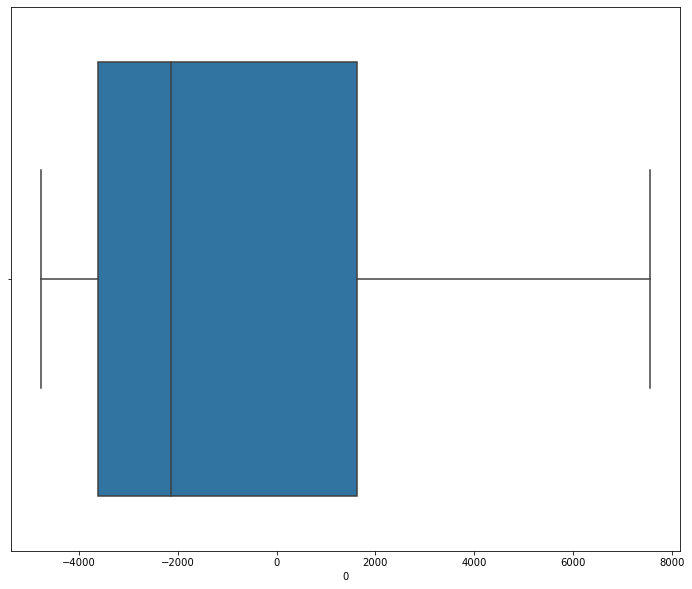

In [192]:
for i in hr_pca.drop('target',axis=1).columns:
    sns.boxplot(hr_pca[i])
    plt.show()

In our case, we can clearly see that PCA lacks of classifying the minority class entirely, this is because PCA considers whole 
minority class as low varience data and removed it. so PCA is not suitable for our models

# MODEL using Scaled data

In [193]:
hr_scaled.head()

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,region,KPIs_met >80%,awards_won?,is_promoted,department_Finance,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,-0.415276,0.025598,1.395766,0.500460,-1.075931,4843,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
65141,-0.415276,-0.627135,1.395766,-0.437395,-0.253282,6428,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7513,-0.415276,-0.104948,-0.250651,0.265996,-1.001145,874,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2542,1.226063,0.547785,-1.897069,0.969387,-1.001145,1175,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
48945,-0.415276,1.331064,-0.250651,-0.906322,0.718939,2260,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [194]:
x=hr_scaled.drop(['is_promoted','recruitment_channel_referred','recruitment_channel_sourcing','gender_m'],axis=1)

In [195]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(x, y, test_size=0.30,random_state=10)
X_train_o

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,region,KPIs_met >80%,awards_won?,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above
employee_id,,,,,,,,,,,,,,,,,,
53947,-0.415276,3.158717,1.395766,0.031532,-0.328069,12343,0,0,0,0,0,1,0,0,0,0,0,0
43072,-0.415276,-1.018775,-1.897069,-0.437395,-0.552428,292,0,0,0,0,0,1,0,0,0,0,0,0
44790,-0.415276,0.808878,0.572557,2.141704,-1.075931,2808,0,0,0,0,0,0,0,0,1,0,0,0
68534,-0.415276,0.025598,0.572557,-0.437395,-1.075931,819,0,0,0,0,0,0,0,0,1,0,0,1
19187,-0.415276,0.678331,1.395766,0.969387,1.092871,12343,1,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62216,-0.415276,-1.540961,-1.897069,-1.140785,0.345008,12343,0,0,0,0,0,0,1,0,0,0,0,1
44272,1.226063,0.025598,-1.897069,0.265996,-1.001145,1318,0,0,0,1,0,0,0,0,0,0,0,1
58965,-0.415276,-0.757681,1.395766,-0.906322,-1.001145,1935,1,0,0,1,0,0,0,0,0,0,0,0


In [201]:
gbc = GradientBoostingClassifier(n_estimators =80 ,max_depth=3, random_state = 10)
abc = AdaBoostClassifier( n_estimators=50,random_state = 10)
xgbc = XGBClassifier(n_estimators=80,max_depth=5,class_weight='balanced')
rf1 = RandomForestClassifier(n_estimators = 80,max_depth=9, random_state = 10,class_weight='balanced')
dt1 = DecisionTreeClassifier(max_depth=5,class_weight='balanced')
lr=LogisticRegression(class_weight='balanced')
gnb=GaussianNB()
rf1.fit(X_train_o, y_train_o)
predictionstest = rf1.predict(X_test_o)
predictionstrain = rf1.predict(X_train_o)
print('train accuracy :', accuracy_score(y_train_o,predictionstrain))
print('tesr accuracy :', accuracy_score(y_test_o,predictionstest))

print(confusion_matrix(y_train_o,predictionstrain))
print(classification_report(y_train_o, predictionstrain))

print(confusion_matrix(y_test_o,predictionstest))
print(classification_report(y_test_o, predictionstest))


train accuracy : 0.7195360354489769
tesr accuracy : 0.7073526728699142
[[24552 10524]
 [  236  3053]]
              precision    recall  f1-score   support

           0       0.99      0.70      0.82     35076
           1       0.22      0.93      0.36      3289

    accuracy                           0.72     38365
   macro avg       0.61      0.81      0.59     38365
weighted avg       0.92      0.72      0.78     38365

[[10378  4686]
 [  126  1253]]
              precision    recall  f1-score   support

           0       0.99      0.69      0.81     15064
           1       0.21      0.91      0.34      1379

    accuracy                           0.71     16443
   macro avg       0.60      0.80      0.58     16443
weighted avg       0.92      0.71      0.77     16443



# Outlier treatment for scaled data

In [202]:
col=['age','previous_year_rating','length_of_service','avg_training_score']

In [203]:
for i in col:
    q3=hr_scaled[i].quantile(0.75)
    q1=hr_scaled[i].quantile(0.25)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    uc=hr_scaled[i].quantile(0.99)
    lc=hr_scaled[i].quantile(0.01)
    
    for j in hr_scaled[i].index:
        if hr_scaled.loc[j,i]>ub:
            hr_scaled.loc[j,i]=uc
        if hr_scaled.loc[j,i]<lb:
            hr_scaled.loc[j,i]=lc

In [204]:
from sklearn.naive_bayes import GaussianNB

In [205]:
gbc = GradientBoostingClassifier(n_estimators = 40,max_depth=9, random_state = 10)
abc = AdaBoostClassifier( n_estimators=50,random_state = 10)
xgbc = XGBClassifier(n_estimators=65,max_depth=5,class_weight='balanced')
rf1 = RandomForestClassifier(n_estimators = 40,max_depth=9, random_state = 10,class_weight='balanced')
dt1 = DecisionTreeClassifier(max_depth=5,class_weight='balanced')
lr1=LogisticRegression(class_weight='balanced',n_jobs=6)
gnb=GaussianNB()

clf_stack = StackingClassifier(classifiers =[gbc,rfc,lr1], meta_classifier = lr, use_probas = True, use_features_in_secondary = True)
 clf_stack.fit(X_train_o, y_train_o)
predictionstest = clf_stack.predict(X_test_o)
predictionstrain = clf_stack.predict(X_train_o)
print('train accuracy :', accuracy_score(y_train_o,predictionstrain))
print('tesr accuracy :', accuracy_score(y_test_o,predictionstest))

print(confusion_matrix(y_train_o,predictionstrain))
print(classification_report(y_train_o, predictionstrain))

print(confusion_matrix(y_test_o,predictionstest))
print(classification_report(y_test_o, predictionstest))


train accuracy : 0.7910074286459012
tesr accuracy : 0.7701757586815058
[[27359  7717]
 [  301  2988]]
              precision    recall  f1-score   support

           0       0.99      0.78      0.87     35076
           1       0.28      0.91      0.43      3289

    accuracy                           0.79     38365
   macro avg       0.63      0.84      0.65     38365
weighted avg       0.93      0.79      0.83     38365

[[11518  3546]
 [  233  1146]]
              precision    recall  f1-score   support

           0       0.98      0.76      0.86     15064
           1       0.24      0.83      0.38      1379

    accuracy                           0.77     16443
   macro avg       0.61      0.80      0.62     16443
weighted avg       0.92      0.77      0.82     16443



#There is no difference after scaling the numerical data